# Latar Belakang
Transportation Security Administration merupakan lembaga pemerintah yang bertanggung jawab untuk menjamin keamanan penerbangan di Amerika Serikat. TSA dibentuk setelah serangan teroris pada 11 September 2001 dengan tujuan untuk melindungi penerbangan dari serangan teroris dan keamanan penerbangan lainnya. TSA ditugaskan untuk menjamin keamanan penerbangan di Amerika Serikat dengan melakukan tindakan preventif, mengevaluasi risiko, dan melakukan inspeksi pada kendaraan, paket, dan pengiriman barang yang beroprasi di bandara.
Tindakan yang bisa diajukan oleh konsumen adalah untuk mengklaim kerugian dari akibat kelalian pihak TSA ialah TSA claims, Merupakan tuntutan hukum yang diajukan oleh individu maupun perusahaan yang mengklaim kerugian maupun kerusakan yang diakibatkan oleh kelalaian petugas dari TSA. 

# Problem 
Dengan diterimanya claim tersebut TSA ingin mencari tahu bandara mana serta maskapai yang memiliki jumlah pengajuan klaim terbanyak. Informasi ini dapat membantu TSA menganalisis bandara dan maskapai yang membutuhkan peningkatan pada bagian sistem keamananya sehingga dapat mengurangi frekuensi pengajuan klaim yang ditujukan terhadap TSA. 
Dalam kasus ini seorang data analyst berusaha untuk dapat membuat analisis terkait masalah tersebut seperti: 


* Berapa total klaim yang dialami dalam jangka waktu 2002-2015
* Bandara yang memiliki total klaim terbanyak 
* Maskapai yang memiliki total klaim terbanyak 
* Tipe claim yang diajukan 
* Item dengan tingkat kehilangan tertinggi 
* Tipe claim yang diterima oleh bandara
* Tipe claim yang diterimah oleh maskapai
* Lokasi claim pada bandara dan maskapai
* Persentase keberhasilan pengembalian barang oleh setiap bandara dan maskapai 

# Data Views

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns 
import plotly.figure_factory as ff
import re
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

In [115]:
df= pd.read_csv('tsa_claims.csv')
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


# Dataset 
- Claim Number: ID unik untuk setiap klaim
- Data received: Tanggal diterima aduan terhadap TSA
- Incident date: Tanggal kejadian kasus pelapor
- Airport code: ID unik bandara
- Airport name: Nama bandara
- Airlines name: Nama maskapai penerbangan
- Claim Type: Jenis klaim yang diajukan pelapor
- Claim Site: Lokasi pengajuan laporan
- Item: Jenis barang yang dilaporkan
- Claim Amount: Nominal biaya yang diajukan pelapor (Dollar AS)
- Status: Status progress laporan klaim
- Close Amount: Nominal biaya ganti rugi oleh TSA (Dollar AS)
- Disposition: Status akhir dari laporan klaim

# Data Understanding & Cleaning

In [116]:
df.columns

Index(['Claim Number', 'Date Received', 'Incident Date', 'Airport Code',
       'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item',
       'Claim Amount', 'Status', 'Close Amount', 'Disposition'],
      dtype='object')

In [117]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info 

Jumlah baris dan kolom di dataset df adalah (204267, 13)


<bound method DataFrame.info of          Claim Number Date Received    Incident Date Airport Code  \
0       0909802M       4-Jan-02      12/12/2002 0:00  EWR           
1       0202417M       2-Feb-02      1/16/2004 0:00   SEA           
2       0202445M       4-Feb-02      11/26/2003 0:00  STL           
3       0909816M       7-Feb-02      1/6/2003 0:00    MIA           
4       2005032379513  18-Feb-02     2/5/2005 0:00    MCO           
...               ...        ...               ...    ...           
204262  2015120427297  20-Nov-15     16-Oct-15        -             
204263  2015123027969  17-Dec-15     2-Dec-15         -             
204264  2016010428072  22-Dec-15     20-Dec-15        -             
204265  2016011328300  30-Dec-15     28-Dec-15        -             
204266  2015123128015  31-Dec-15     23-Nov-15        -             

                           Airport Name          Airline Name  \
0       Newark International Airport     Continental Airlines   
1       S

In [118]:
df.describe 

<bound method NDFrame.describe of          Claim Number Date Received    Incident Date Airport Code  \
0       0909802M       4-Jan-02      12/12/2002 0:00  EWR           
1       0202417M       2-Feb-02      1/16/2004 0:00   SEA           
2       0202445M       4-Feb-02      11/26/2003 0:00  STL           
3       0909816M       7-Feb-02      1/6/2003 0:00    MIA           
4       2005032379513  18-Feb-02     2/5/2005 0:00    MCO           
...               ...        ...               ...    ...           
204262  2015120427297  20-Nov-15     16-Oct-15        -             
204263  2015123027969  17-Dec-15     2-Dec-15         -             
204264  2016010428072  22-Dec-15     20-Dec-15        -             
204265  2016011328300  30-Dec-15     28-Dec-15        -             
204266  2015123128015  31-Dec-15     23-Nov-15        -             

                           Airport Name          Airline Name  \
0       Newark International Airport     Continental Airlines   
1      

In [119]:
#Drop rows dengan nulls terbanyak
df.dropna(thresh=6, inplace=True)

In [120]:
# Cek Distribusi nulls per row
print(f'Jumlah distribusi nulls per row pada dataset df adalah {df.shape}')
temp = df.isnull().sum(axis=1).value_counts().sort_index()
print ("Nulls    Rows     Cum. Rows")
for i in range(len(temp)):
    print ("{:2d}: {:10d} {:10d}".format(temp.index[i], temp[i], temp[i:].sum()))

Jumlah distribusi nulls per row pada dataset df adalah (203461, 13)
Nulls    Rows     Cum. Rows
 0:      94848     203461
 1:      32404     108613
 2:      66106      76209
 3:       4582      10103
 4:       1970       5521
 5:       2253       3551
 6:        977       1298
 7:        321        321


In [121]:
# Cek Value Status
df.Status.str.split(";").map(lambda x: "Null" if type(x)==float else x[0]).value_counts()

Denied                                               68336
Approved                                             34997
Deny                                                 28237
Settled                                              27955
-                                                    12752
Approve in Full                                      12364
Canceled                                             6651 
Settle                                               5766 
Insufficient                                         4972 
Closed as a contractor claim                         1312 
In litigation                                        108  
In review                                            9    
Claim has been assigned for further investigation    1    
Pending response from claimant                       1    
Name: Status, dtype: int64

In [122]:
# Merubah Nama value Status agar lebih mudah melakukan analisis
valid_targets = ['Denied','Approved','Deny','Settled','Approve in Full', 'Settle']

df = df[df.Status.isin(valid_targets)]
df.Status.replace("Approve in Full","Approved",inplace=True)
df.Status.replace("Deny","Denied",inplace=True)
df.Status.replace("Settle","Settled",inplace=True)

print(df.Status.value_counts())
print(len(df))

Denied      96573
Approved    47361
Settled     33721
Name: Status, dtype: int64
177655


In [123]:
df.isna().sum().sort_values(ascending=False)

Close Amount     47775
Disposition      46407
Airline Name     28287
Claim Type       5875 
Airport Code     4168 
Airport Name     4168 
Item             2869 
Incident Date    761  
Claim Amount     750  
Claim Site       267  
Date Received    114  
Claim Number     0    
Status           0    
dtype: int64

# Duplicate Data 

In [124]:
pd.set_option('display.max_colwidth', -1)

# Mengecheck data unik di setiap kolom

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0   Claim Number   177655             
1   Date Received  3908               
2   Incident Date  23437              
3   Airport Code   453                
4   Airport Name   472                
5   Airline Name   307                
6   Claim Type     10                 
7   Claim Site     6                  
8   Item           4391               
9   Claim Amount   34935              
10  Status         3                  
11  Close Amount   17147              
12  Disposition    3                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [125]:
df[df.duplicated(keep=False)]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition


In [126]:
df = df.drop_duplicates()
df.shape

(177655, 13)

* Dari Dataset TSA Claims terdapat **177.655** Jumlah baris dam 13 kolom 
* Sudah tidak ditemukan adanya data duplicate 

# Missing Values

In [127]:
df.isna().sum().sort_values(ascending=False)

Close Amount     47775
Disposition      46407
Airline Name     28287
Claim Type       5875 
Airport Code     4168 
Airport Name     4168 
Item             2869 
Incident Date    761  
Claim Amount     750  
Claim Site       267  
Date Received    114  
Claim Number     0    
Status           0    
dtype: int64

In [128]:
# Persentase missing values pada total data
(df.isna().sum()/len(df)*100).sort_values(ascending=False)

Close Amount     26.892010
Disposition      26.121978
Airline Name     15.922434
Claim Type       3.306971 
Airport Code     2.346120 
Airport Name     2.346120 
Item             1.614928 
Incident Date    0.428358 
Claim Amount     0.422167 
Claim Site       0.150291 
Date Received    0.064169 
Claim Number     0.000000 
Status           0.000000 
dtype: float64

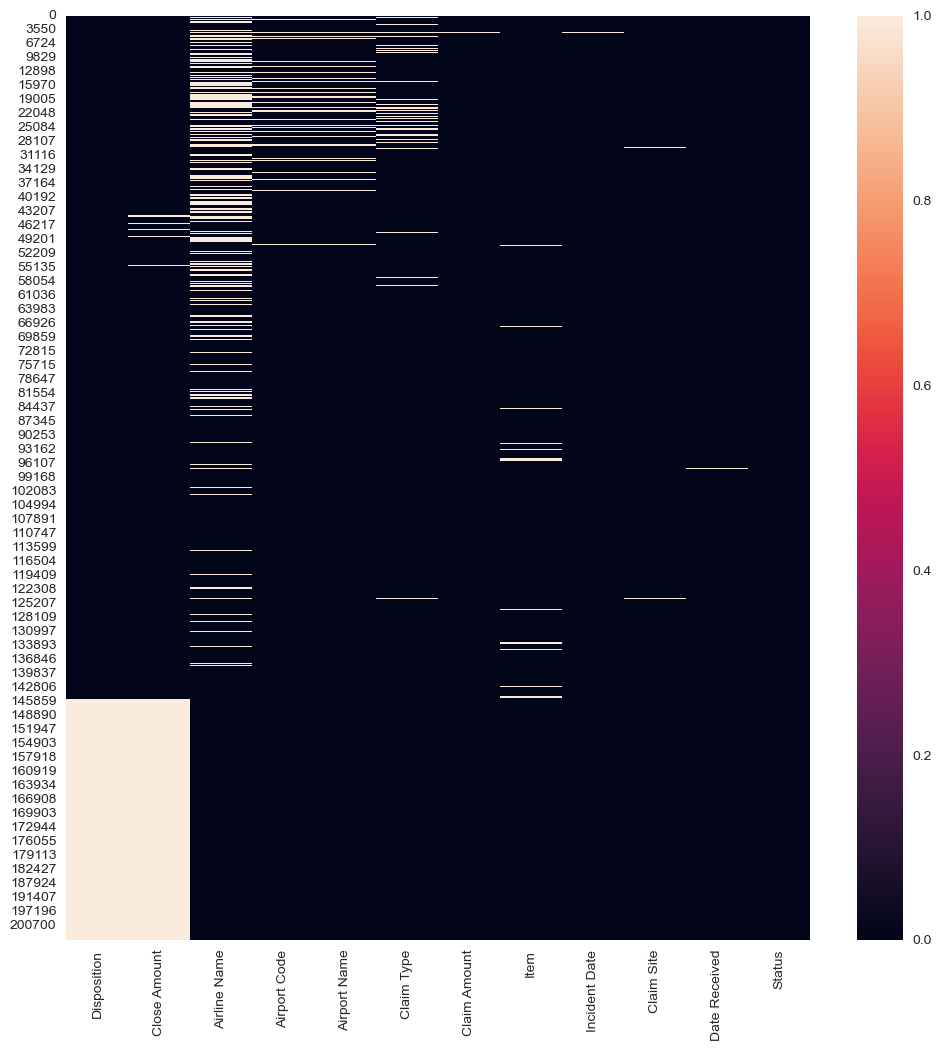

In [129]:
# Visualisasi heatmap distribusi data

plt.figure(figsize=(12,12))
sns.heatmap(df[['Disposition','Close Amount','Airline Name','Airport Code','Airport Name','Claim Type','Claim Amount','Item','Incident Date','Claim Site','Date Received','Status']].isna());

Dari analisa untuk data missing values berdasarkan heatmap, informasi yang didapatkan adalah:

Missing Value di kolom Airline Name, Close Amount, dan Disposition memiliki proporsi yang cukup besar yaitu (>15%), dengan kolom Disposition menjadi yang terbesar dengan persentase Missing Value mencapai 35,6%.
Namun pada data kolom Close Amount dan Disposition tidak relevan dengan pernyataan masalah yang akan dianalisis maka terdapat 
2 pilihan untuk mengatasi missing value tersebut yaitu:

* Opsi pertama dengan menghapus baris atau kolom yang berisi Missing Value.
* Opsi kedua yaitu dengan mengisi data yang kosong. Opsi ini lebih relevan jika melihat data yang dibutuhkan untuk melakukan analisis. Beberapa metode bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi value yang hilang dengan value yang sebenarnya, atau sedekat mungkin dengan value yang sebenarnya. Jika masih terdapat data yang tidak terisi, dapat menggunakan metode angka mean, median, atau modus. Menghapus kolom dapat dijadikan opsi paling terakhir.

# Data Cleaning
Kolom Airport Code dan Aiport Name harus memiliki hubungan diantara kedua kolomnya dengan kondisi Airport Code hanya memiliki satu nama Airport Name sehingga harus dilakukan proses *cleaning*

In [130]:
tempAPcode = df.groupby('Airport Code')['Airport Name'].nunique().sort_values(ascending=False)

print(df[df['Airport Code'].isin(tempAPcode[tempAPcode>1].index)].groupby('Airport Code')['Airport Name'].unique())
print(len(df[df['Airport Code'].isin(tempAPcode[tempAPcode>1].index)].groupby('Airport Code')['Airport Name'].unique()))

Airport Code
BOS    [Boston (Logan) International Airport, Boston (Logan) International Airport ]      
BUR    [Bob Hope, Bob Hope ]                                                              
DEN    [Denver International Airport, Denver International Airport ]                      
DFW    [Dallas-Fort Worth International Airport, Dallas-Fort Worth International Airport ]
DUJ    [Dubois Jefferson County, Dubois Jefferson County ]                                
EAR    [Kearney Municipal Airport, Kearney Municipal Airport ]                            
HIB    [Chisolm-Hibbing Municipal, Chisolm-Hibbing Municipal ]                            
INL    [Falls International, Falls International ]                                        
JHM    [Kapalua Airport, Kapalua Airport ]                                                
LAX    [Los Angeles International Airport, Los Angeles International Airport ]            
LGA    [LaGuardia, LaGuardia ]                                               

Dari hasil pengecekan data dari airport code terdapat 19 jenis **Airport Code** yang memiliki nama lebih dari satu nama airport, maka dari itu agar dapat memiliki **Unique Code** untuk airport name maka perlu dilakukan replace untuk **airport name** yang masih memiliki nama lebih dari satu.

In [131]:
# Menghapus karakter spasi di awal atau di akhir dari nilai di kolom 'Airport Code' dari DataFrame (df)
df['Airport Code'] = df['Airport Code'].str.strip()
df['Airport Name'] = df['Airport Name'].str.strip()

# Airport Code yang memiliki 2 Nilai Airport Name yang berbeda perlu kita lakukan replace agar menjadi satu nilai yang sama
df['Airport Name'] = df['Airport Name'].replace(to_replace='Pensacola Regional',value='Pensacola International Airport')
df['Airport Name'] = df['Airport Name'].replace(to_replace='Gallatin Field',value='Bozeman Yellowstone International Airport')

In [132]:
df['Airline Name'].nunique()

307

In [133]:
# Menghapus baris dengan nilai yang hilang pada kolom 'Airport Code' dan 'Airport Name'  
df.dropna(subset=['Airport Code', 'Airport Name'], inplace=True)

In [134]:
df[['Airport Code', 'Airport Name']].isna().sum()

Airport Code    0
Airport Name    0
dtype: int64

Column **Airport Code** dan **Airport Name** sudah tidak memiliki value yang kosong, maka dari itu analisis selanjutnya sudah dapat dilakukan.

In [135]:
pd.DataFrame(df['Airline Name'].unique())

,0
0,Continental Airlines
1,NaN
2,American Airlines
3,Delta (Song)
4,Air Tran Airlines(do not use)
...,...
303,Piedmont Airlines Inc
304,Japan Air Systems
305,Republic Airways
306,Norwegian Airlines


In [136]:
df['Airline Name'].unique()

array(['Continental Airlines', nan, 'American Airlines', 'Delta (Song)',
       'Air Tran Airlines(do not use)', 'USAir', 'Southwest Airlines',
       'AirTran Airlines', 'Delta Air Lines', 'America West', 'UAL',
       'Virgin Atlantic', 'Jet Blue', 'Northwest Airlines',
       'Alaska Airlines', 'Tran Meridian Airlines', 'Spirit Airlines',
       'Frontier Airlines', 'American West', 'Air Canada',
       'America Trans Air', 'Aero Mexico', 'Hawaiian Airlines',
       'Lufthansa', 'Lan Airlines', 'British Airways', 'Aloha Airlines',
       'Midwest Express Airlines', 'Qantus Airways',
       'Frontier Aviation Inc', 'Korean Airlines', 'Air Jamaica',
       'KLM Royal Dutch Airlines', 'Alitalia', 'Air France', 'Aer Lingus',
       'Austrian Airlines', 'Japan Airlines', 'Comair Inc',
       'ATA Aerocondor', 'Tower Air', 'Singapore Airlines', 'Mexicana',
       'Swiss Air', 'Aero Flot', 'Sun Country Airlines Inc',
       'Air 2000 Ltd Great Britain', 'Horizon Air', 'Allegiant Air',
    

In [137]:
# Menghapus spasi di awal dan di akhir dari nilai pada kolom 'Airline Name' dari DataFrame dan mengganti spasi dengan karakter kosong
df['Airline Name'] = df['Airline Name'].str.strip().str.replace(' ','')

# Mengisi missing value Airline Name dan mengganti value '-' di Airline Name dengan kategori Undisclosed 
df['Airline Name'] = df['Airline Name'].fillna('Undisclosed')
df.loc[df['Airline Name'] == '-', 'Airline Name']='Undisclosed'

In [138]:
df['Airline Name'].isna().sum()

0

In [139]:
# Cek Missing Value
df.isna().sum()

Claim Number     0    
Date Received    102  
Incident Date    390  
Airport Code     0    
Airport Name     0    
Airline Name     0    
Claim Type       4984 
Claim Site       257  
Item             2833 
Claim Amount     405  
Status           0    
Close Amount     47700
Disposition      46407
dtype: int64

## Date Received dan Incident Date
Kolom ***Date Received*** dan ***Incident Date*** masih memiliki tipe data *object*. Sehingga perlu ditransformasi datanya menjadi ukuran waktu *(Date Time)*

In [140]:
df['Date Received'] = pd.to_datetime(df['Date Received'])
df['Incident Date'] = pd.to_datetime(df['Incident Date'],errors='coerce')

In [141]:
df['Date Received'].dt.year.value_counts().sort_index()

1994.0    1    
1996.0    1    
2000.0    4    
2002.0    713  
2003.0    16389
2004.0    25619
2005.0    22412
2006.0    17652
2007.0    17380
2008.0    15246
2009.0    11593
2010.0    9729 
2011.0    9795 
2012.0    8891 
2013.0    6233 
2014.0    5118 
2015.0    6601 
2020.0    1    
2025.0    4    
2040.0    1    
2044.0    1    
2055.0    1    
Name: Date Received, dtype: int64

In [142]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,ContinentalAirlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,Undisclosed,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,AmericanAirlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,AmericanAirlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta(Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204189,2015070223650,2015-06-29,2015-05-08,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Employee Loss (MPCECA),Motor Vehicle,-,$250.00,Approved,NaN,NaN
204202,2015092425588,2015-09-10,2015-08-31,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Motor Vehicle,Other,-,$656.56,Approved,NaN,NaN
204203,2015102026116,2015-09-29,2015-09-22,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Motor Vehicle,Motor Vehicle,-,$1;520.85,Approved,NaN,NaN
204204,2015101326019,2015-10-13,2015-07-16,ZZX,Non TSA Airport (motor vehicle),Undisclosed,Motor Vehicle,Motor Vehicle,-,$643.32,Approved,NaN,NaN


In [143]:
# Mengatur rentang tahun dataset menjadi 2002-2015 untuk mempermudah melakukan analisis

df = df[df['Date Received'].dt.year.isin(range(2002,2015+1))]
df = df[df['Incident Date'].dt.year.isin(range(2002,2015+1))]

In [144]:
# Menghapus nilai baris dengan kondisi waktu 'Incident Date' lebih baru 'Date Received'

indeks = df[df['Incident Date'] > df['Date Received']].index
df.drop(index=indeks, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,NaN,Checkpoint,Clothing - Shoes; belts; accessories; etc.,$75.00,Approved,$75.00,Approve in Full
1,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Undisclosed,Passenger Property Loss,Checkpoint,Jewelry - Fine,$4;457.29,Denied,NaN,Deny
2,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,NaN,Checkpoint,Eyeglasses - (including contact lenses),$16.71,Approved,$17.00,Approve in Full
3,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
4,15324,2002-07-12,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Undisclosed,NaN,Other,Luggage (all types including footlockers),$50.00,Denied,$0.00,Deny


In [145]:
df.isna().sum().sort_values(ascending=True)

Claim Number     0    
Date Received    0    
Incident Date    0    
Airport Code     0    
Airport Name     0    
Airline Name     0    
Status           0    
Claim Amount     214  
Claim Site       238  
Item             2771 
Claim Type       4684 
Disposition      46237
Close Amount     47501
dtype: int64

## Claim Type dan Claim Site

In [146]:
# Mengisi missing values dari kolom Claim Type dan Claim Site dengan nilai 'Other'
df[['Claim Type', 'Claim Site']] = df[['Claim Type', 'Claim Site']].fillna('Other')
df[['Claim Type', 'Claim Site']].isna().sum()

Claim Type    0
Claim Site    0
dtype: int64

In [147]:
# Checking data
df['Claim Type'].value_counts()

Passenger Property Loss    99838
Property Damage            64804
Other                      4684 
Personal Injury            902  
Employee Loss (MPCECA)     417  
Passenger Theft            416  
Motor Vehicle              237  
-                          83   
Complaint                  14   
Wrongful Death             3    
Bus Terminal               1    
Name: Claim Type, dtype: int64

In [148]:
# Imputing '-' menjadi 'Other'
df.loc[df['Claim Type'] =='-', 'Claim Type'] = 'Other'

In [149]:
df['Claim Type'].value_counts()

Passenger Property Loss    99838
Property Damage            64804
Other                      4767 
Personal Injury            902  
Employee Loss (MPCECA)     417  
Passenger Theft            416  
Motor Vehicle              237  
Complaint                  14   
Wrongful Death             3    
Bus Terminal               1    
Name: Claim Type, dtype: int64

In [150]:
df['Claim Site'].value_counts()

Checked Baggage    136543
Checkpoint         33384 
Other              1111  
Motor Vehicle      286   
-                  66    
Bus Station        9     
Name: Claim Site, dtype: int64

In [151]:
# Imputing '-' menjadi 'Other'
df.loc[df['Claim Site'] =='-', 'Claim Site'] = 'Other'

In [152]:
df['Claim Site'].value_counts()

Checked Baggage    136543
Checkpoint         33384 
Other              1177  
Motor Vehicle      286   
Bus Station        9     
Name: Claim Site, dtype: int64

In [153]:
df.isna().sum().sort_values(ascending=True)

Claim Number     0    
Date Received    0    
Incident Date    0    
Airport Code     0    
Airport Name     0    
Airline Name     0    
Claim Type       0    
Claim Site       0    
Status           0    
Claim Amount     214  
Item             2771 
Disposition      46237
Close Amount     47501
dtype: int64

Data Missing Value dari Column Claim Type dan Claim Type telah bersih dari Missing Value maka dapat dilakukan analisa ke tahap selanjutnya 

# Item

In [154]:
# Checking data pada kolom Item untuk melihat kebutuhan data cleaning
df['Item'].unique()

array(['Clothing - Shoes; belts; accessories; etc.', 'Jewelry - Fine',
       'Eyeglasses - (including contact lenses)', ...,
       'Baggage/Cases/Purses; Clothing; Clothing; Travel Accessories',
       'Medical/Science; Medical/Science; Personal Accessories',
       'Baggage/Cases/Purses; Musical Instruments & Accessories; Musical Instruments & Accessories'],
      dtype=object)

In [155]:
# Menghapus Whitespace dari kolom Item
df['Item'].str.strip()

0         Clothing - Shoes; belts; accessories; etc.
1         Jewelry - Fine                            
2         Eyeglasses - (including contact lenses)   
3         Luggage (all types including footlockers) 
4         Luggage (all types including footlockers) 
                            ...                     
171394    -                                         
171395    -                                         
171396    -                                         
171397    -                                         
171398    -                                         
Name: Item, Length: 171399, dtype: object

In [156]:
# Mengambil Kata pertama dari unique value dengan split berdasarkan ' - ', '; ', ' ('
df['Item'] = df['Item'].str.split(' - ',expand=True)[0]
df['Item'] = df['Item'].str.split('; ',expand=True)[0]
df['Item'] = df['Item'].str.split(' \(',expand=True)[0]

In [157]:
df['Item'].unique()

array(['Clothing', 'Jewelry', 'Eyeglasses', 'Luggage', 'Other',
       'Computer', 'Currency', 'Cell Phones', 'Cameras', 'Cosmetics',
       'Baby', nan, 'Photographic Film', 'PDA', 'DVD/CD Players', 'Locks',
       'Musical Instruments', 'Stereo Items & Accessories', 'Fish/Game',
       'Medicines', 'Watches', 'Tools', 'Toys', 'Alcoholic beverages',
       'Dental Equipment and Instruments', 'Books', 'Dishes',
       'Hearing Aids', 'Clocks', 'Audio',
       'Medical Equipment & Insturments', 'Candles',
       'Camping Equipment & Supplies', 'Bags',
       'Sporting Equipment & Supplies', 'Lighting Supplies',
       'Paintings and Pictures', 'Lighters', 'Game Equipment',
       'House Keeping Items', 'GPS', 'Automobile Parts', 'Brushes',
       'Briefcases', 'Barber Supplies', 'Kitchen Utensils -Pots',
       'Knick Knacks', 'Handbags & Purses', 'Bedding', 'Silverplate',
       'MP3 Players-(iPods', 'Firearms', 'Professional Equipment',
       'Bicycles', 'Ceramics', 'Boxes', 'Binocul

In [158]:
df[df['Item'].isna()]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
33,21013,2002-09-30,2002-09-01 00:00:00,PHL,Philadelphia International Airport,DeltaAirLines,Personal Injury,Other,NaN,$5;000.00,Denied,$0.00,Deny
45,21111,2002-10-11,2002-04-10 00:00:00,TSA,TSA - Non-Specified Airport,Undisclosed,Motor Vehicle,Motor Vehicle,NaN,$3;080.69,Approved,$3;080.69,Approve in Full
278,28701,2002-11-26,2002-10-05 00:00:00,LEX,Blue Grass ;Lexington,DeltaAirLines,Personal Injury,Checkpoint,NaN,$249.27,Approved,$249.27,Approve in Full
599,17206,2002-12-24,2002-08-23 00:00:00,BOS,Boston (Logan) International Airport,UAL,Personal Injury,Checkpoint,NaN,$7;500.00,Settled,$4;748.49,Settle
686,0616552L,2002-12-31,2002-12-16 00:00:00,PSP,Palm Springs International,UAL,Personal Injury,Checkpoint,NaN,$1;800.00,Denied,$0.00,Deny
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125140,2010010567165,2009-12-30,2009-10-12 00:00:00,SYR,Syracuse-Hancock International,DeltaAirLines,Passenger Property Loss,Checkpoint,NaN,$689.42,Approved,$689.42,Approve in Full
125147,2009123066912,2009-12-30,2009-12-15 00:00:00,GSO,Piedmont Triad International Airport,DeltaAirLines,Property Damage,Checked Baggage,NaN,$2;300.00,Denied,$0.00,Deny
125159,2010010567143,2009-12-30,2009-12-04 11:55:00,MSP,Minneapolis/ St.Paul International Airport,DeltaAirLines,Property Damage,Checkpoint,NaN,$20.00,Denied,$0.00,Deny
125160,2010010567146,2009-12-30,2009-12-10 06:00:00,DFW,Dallas-Fort Worth International Airport,AmericanAirlines,Property Damage,Checkpoint,NaN,$3;650.00,Denied,$0.00,Deny


In [159]:
# Mengganti nilai '-' dengan 'Others'
df['Item'].replace(['-'],'Others',inplace=True)

# Mengganti nilai NaN dengan 'Others'
df['Item'].fillna(value='Others',inplace=True)

df.isna().sum()

Claim Number     0    
Date Received    0    
Incident Date    0    
Airport Code     0    
Airport Name     0    
Airline Name     0    
Claim Type       0    
Claim Site       0    
Item             0    
Claim Amount     214  
Status           0    
Close Amount     47501
Disposition      46237
dtype: int64

Data dari Item memiliki 2771 rows × 13 columns serta data telah tidak terdapat lagi Missing Value maka dapat dilakukan analisa ke tahap selanjutnya 

## Claim Number, Claim Amount, Close Amount, dan Disposition

Kolom Claim Number, Claim Amount, Close Amount, dan Disposition, tidak dibutuhkan dalam analisis sehingga kolom tersebut dapat hilangkan dengan menggunakan *drop* agar lebih mempermudah analisis

In [160]:
df.drop(columns=['Claim Number', 'Claim Amount', 'Close Amount', 'Disposition'], inplace=True)
df.isna().sum()

Date Received    0
Incident Date    0
Airport Code     0
Airport Name     0
Airline Name     0
Claim Type       0
Claim Site       0
Item             0
Status           0
dtype: int64

In [161]:
# Merubah format dataframe index
df.columns = [s.strip().replace(" ","_") for s in df.columns]

In [162]:
#Fill NA for categorical columns
fill_columns = ["Airline_Name","Airport_Name","Airport_Code","Claim_Type","Claim_Site","Item"]
df[fill_columns] = df[fill_columns].fillna("-")

In [163]:
#Check multiple Airport Names
temp = df.groupby("Airport_Code").Airport_Name.nunique().sort_values(ascending=False)
print(df[df.Airport_Code.isin(temp[temp>1].index)].groupby("Airport_Code").Airport_Name.unique().head())
print("\n---\n")

Series([], Name: Airport_Name, dtype: object)

---



In [164]:
# Melihat Distribusi Airport Claim 
temp = df.Airport_Code.value_counts()
print("Total: {} airports, {} complaints".format(temp.count(),temp.sum()))
for num in range(1000,1,-100):
    print("Under {}: {} airports, {} complaints".format(num, temp[temp<num].count(),temp[temp<num].sum()))

level = 200
#Set airport and code to "Other" under level
def set_other(row, keep_items):
    if row.Airport_Code in keep_items:
        row["Airport_Code_Group"] = row.Airport_Code
        row["Airport_Name_Group"] = row.Airport_Name
    else:
        row["Airport_Code_Group"] = 'Other'
        row["Airport_Name_Group"] = 'Other'
    return row

keep_set = set(temp[temp>=level].index)
df = df.apply(lambda x: set_other(x,keep_set),axis=1)

Total: 453 airports, 171399 complaints
Under 1000: 409 airports, 42076 complaints
Under 900: 406 airports, 39201 complaints
Under 800: 401 airports, 34930 complaints
Under 700: 395 airports, 30467 complaints
Under 600: 386 airports, 24541 complaints
Under 500: 381 airports, 21702 complaints
Under 400: 374 airports, 18702 complaints
Under 300: 367 airports, 16390 complaints
Under 200: 351 airports, 12447 complaints
Under 100: 311 airports, 6867 complaints


In [165]:
# Merubah Nama Maskapai Agar lebih mudah melakukan analisis 
df["Airline_Name"] = df.Airline_Name.str.strip().str.replace(" ","")
df.Airline_Name.replace("AmericanEagle","AmericanAirlines",inplace=True)
df.Airline_Name.replace("AmericanWest","AmericaWest",inplace=True)
df.Airline_Name.replace("AirTranAirlines(donotuse)","AirTranAirlines",inplace=True)
df.Airline_Name.replace("AeroflotRussianInternational","AeroFlot",inplace=True)
df.Airline_Name.replace("ContinentalExpressInc","ContinentalAirlines",inplace=True)
df.Airline_Name.replace("Delta(Song)","DeltaAirLines",inplace=True)
df.Airline_Name.replace("FrontierAviationInc","FrontierAirlines",inplace=True)
df.Airline_Name.replace("NorthwestInternationalAirwaysLtd","NorthwestAirlines",inplace=True)
df.Airline_Name.replace("SkywestAirlinesAustralia","SkywestAirlinesIncUSA",inplace=True)

df.Airline_Name.value_counts().head(10)
print(len(df))

171399


Setelah melihat distribusi data dari claim setiap airport dan airline telah didapatkan dari sebanyak **453 airports dan 218 airline** memiliki total **171.399** complaints, kemudian masih terdapat banyak maskapai yang memiliki nama double untuk satu airline yang sama yang kemudian telah di replace menjadi satu nama agar lebih memudahkan analisis menggunakan data yang konkrit.

In [166]:
#Melihat jumlah item dengan claim terbanyak 
df_item = df.Item.str.split("-").map(lambda x: "" if type(x) == float else x[0])
df_item = df_item.str.split(r" \(").map(lambda x: x[0])
df_item = df_item.str.split(r" &").map(lambda x: x[0])
df_item = df_item.str.split(r"; ").map(lambda x: x[0])
df_item = df_item.str.strip()

categories = df_item.value_counts()

categories[categories > 100]

Other                               31201
Clothing                            20138
Luggage                             16561
Jewelry                             13049
Cameras                             12595
Computer                            12317
Locks                               9393 
Baggage/Cases/Purses                6931 
Cosmetics                           6140 
Others                              5395 
Eyeglasses                          3678 
Travel Accessories                  3270 
Currency                            3191 
Personal Electronics                2553 
Cell Phones                         2306 
Sporting Equipment                  1838 
Personal Accessories                1778 
DVD/CD Players                      1181 
MP3 Players                         962  
Medicines                           925  
Food                                882  
Watches                             861  
Alcoholic beverages                 767  
Medical/Science                   

Setelah melihat dari data item yang telah dijabarkan maka, terdapat list dengan jumlah item dengan claim terbanyak serta masih terapat item yang tidak terdeteksi maka valuenya harus diubah menjadi **Other** agar lebih memudahkan untuk proses analisis selanjutnya. 

In [167]:
#Claim Type & Claim Site 
print(df.Claim_Type.value_counts())
print(df.Claim_Site.value_counts())

Passenger Property Loss    99838
Property Damage            64804
Other                      4767 
Personal Injury            902  
Employee Loss (MPCECA)     417  
Passenger Theft            416  
Motor Vehicle              237  
Complaint                  14   
Wrongful Death             3    
Bus Terminal               1    
Name: Claim_Type, dtype: int64
Checked Baggage    136543
Checkpoint         33384 
Other              1177  
Motor Vehicle      286   
Bus Station        9     
Name: Claim_Site, dtype: int64


Setelah melihat data dari **Claim Type** dan **Claim Site** maka telah diketahui setiap jumlah dari tipe klaim yang dilakukan oleh penumpang serta dapat diindentifikasi dimana letak klaim terbanyak yang dilakukan oleh penumpang

# Data Cleaned 
Data Telah bersih dari missing value dan null langkah selanjutnya adalah melakukan analisa 

In [168]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(171399, 11)


,dataFeatures,dataType,null,unique,uniqueSample
0,Date_Received,datetime64[ns],0,3806,"[2009-05-05T00:00:00.000000000, 2012-05-01T00:00:00.000000000]"
1,Incident_Date,datetime64[ns],0,22968,"[2010-12-21T19:04:00.000000000, 2013-03-08T19:00:00.000000000]"
2,Airport_Code,object,0,453,"[LAR, PGA]"
3,Airport_Name,object,0,453,"[Mercer County; Bluefield, Lincoln Municipal]"
4,Airline_Name,object,0,218,"[AlohaIslandairInc, EVAairlines]"
5,Claim_Type,object,0,10,"[Passenger Theft, Property Damage]"
6,Claim_Site,object,0,5,"[Bus Station, Other]"
7,Item,object,0,130,"[Microscopes & Telescopes, Crafting & Hobby]"
8,Status,object,0,3,"[Denied, Approved]"
9,Airport_Code_Group,object,0,103,"[PSP, TPA]"


Sebelum proses *data cleaning*, dataset memiliki 204267 rows x 13 columns. Sekarang dataset tersebut memiliki 171399 rows, 11 Columns. dengan mengisi bagian data kosong dengan value yang berhubungan dengan kebutuhan analisis dan menghapus data yang tidak dibutuhkan untuk keperluan analisis. 

# Data Analysis
Setelah *data cleaning* dilakukan, Tahap  selanjutnya ialah melakukan *data analisis* untuk mencari tahu Bandara, maskapai, Item serta lokasi barang hilang dilaporkan.
dengan jumlah aduan klaim terbanyak yang kemudian dapat menjawab masalah **bagaimana karakteristik klaim yang diajukan di setiap Bandara dan maskapai oleh penumpang**

In [169]:
Airport = df['Airport_Code'].value_counts()
print(f'Total: {Airport.count()} Airport, {Airport.sum()} Klaim')

Total: 453 Airport, 171399 Klaim


Dari data diatas diketahui bahwa terdapat 453 bandara dengan klaim sebanyak 1771399 klaim pada dataset yang kita lakukan pengolahan. Selanjutnya kita akan melakukan analisis untuk menjawab pernyataan masalah berikut:

* Berapa total klaim yang dialami dalam jangka waktu 2002-2015
* Bandara yang memiliki total klaim terbanyak 
* Maskapai yang memiliki total klaim terbanyak 
* Tipe claim yang diajukan 
* Item dengan tingkat kehilangan tertinggi 
* Tipe claim yang diterima oleh bandara
* Tipe claim yang diterimah oleh maskapai
* Lokasi claim pada bandara dan maskapai
* Persentase keberhasilan pengembalian barang oleh setiap bandara dan maskapai


In [170]:
# Menggabungkan kolom Year dan Date Received
df['Year'] = df['Date_Received'].dt.year
df.head()

,Date_Received,Incident_Date,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item,Status,Airport_Code_Group,Airport_Name_Group,Year
0,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Other,Checkpoint,Clothing,Approved,BWI,Baltimore/Washington Intl Thurgood Marshall,2002
1,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Undisclosed,Passenger Property Loss,Checkpoint,Jewelry,Denied,ATL,Hartsfield-Jackson Atlanta International Airport,2002
2,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Checkpoint,Eyeglasses,Approved,BWI,Baltimore/Washington Intl Thurgood Marshall,2002
3,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,AmericanAirlines,Other,Other,Luggage,Denied,BWI,Baltimore/Washington Intl Thurgood Marshall,2002
4,2002-07-12,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Undisclosed,Other,Other,Luggage,Denied,BWI,Baltimore/Washington Intl Thurgood Marshall,2002


In [171]:
# Total Claim yang terjadi dari 2002-2015 
dfTotalClaim = df[['Claim_Type']].count()
dfTotalClaim

Claim_Type    171399
dtype: int64

In [172]:
ClaimPerYear = df.groupby('Year', as_index=False)[['Claim_Type']].count()
ClaimPerYear

,Year,Claim_Type
0,2002,691
1,2003,16009
2,2004,25115
3,2005,22076
4,2006,17515
5,2007,17189
6,2008,15100
7,2009,11507
8,2010,9654
9,2011,9732


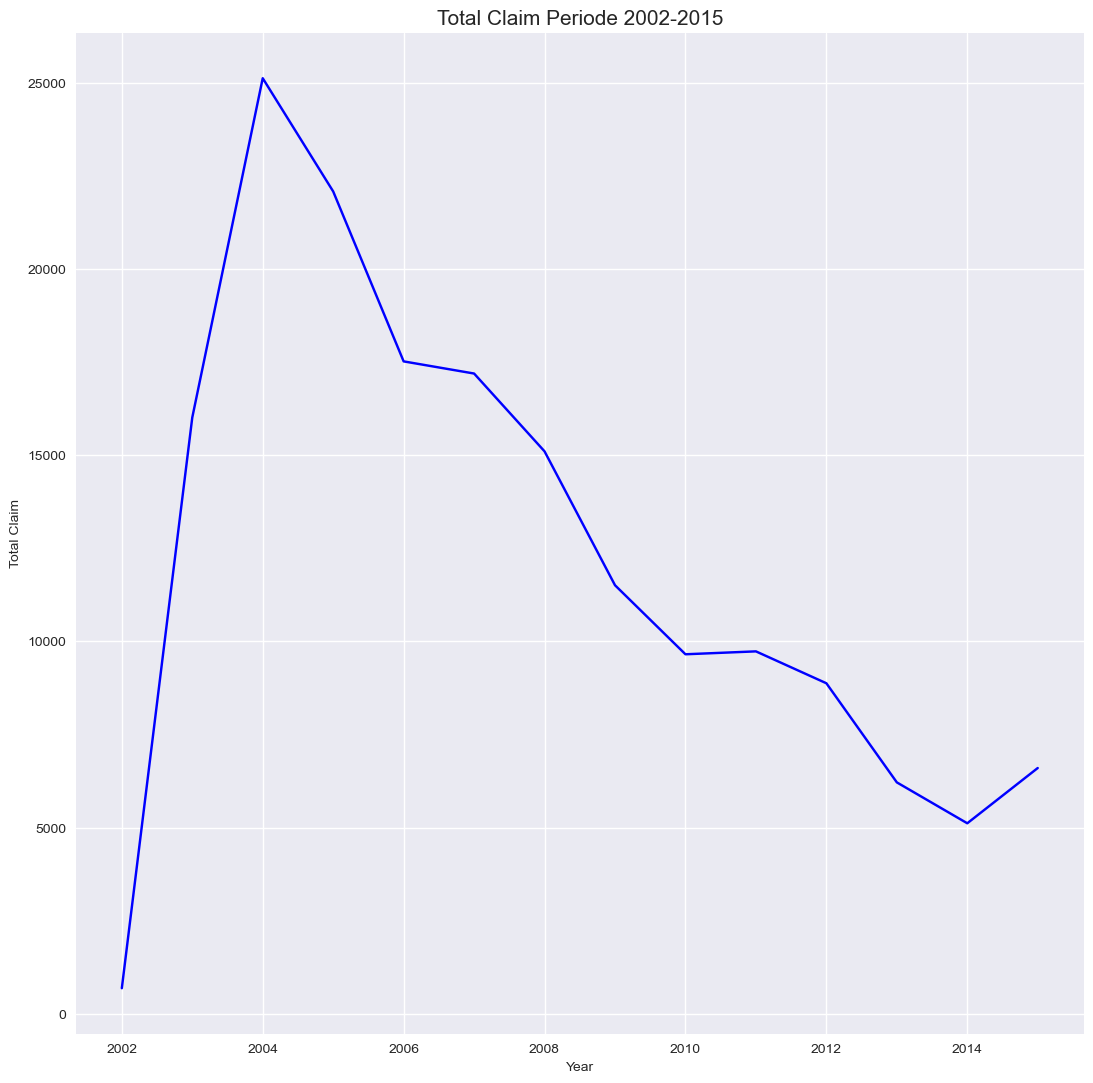

In [173]:
# Total claim dari 2002-2015
plt.style.use('seaborn')

plt.figure(figsize=(13,13))
plt.plot(ClaimPerYear['Year'], ClaimPerYear['Claim_Type'], color='blue')
plt.title('Total Claim Periode 2002-2015', size=15)
plt.xlabel('Year', size=10)
plt.ylabel('Total Claim', size=10)
plt.show()

Grafik tersebut menjelaskan bahwa perkembangan jumlah claim yang dilakukan dari tahun **2002** hingga tahun **2015** dengan total claim tertinggi terjadi pada tahun **2004** dengan total **27.246** Claim, Namum setelah terjadi lonjakan claim tertinggi terjadi penurunan jumlah claim hingga tahun **2014** setelah tahun **2014** terdapat peningkatan jumlah claim kembali namun tidak terlalu signifikan

# Airport Claim

In [174]:
# Top 10 Bandara dengan klaim terbanyak  
dfTopClaimAirport = df[['Airport_Code','Airport_Name']].value_counts().head(10).to_frame().reset_index()

dfTopClaimAirport.rename(columns = {0:'Total Claim'}, inplace = True)
dfTopClaimAirport

,Airport_Code,Airport_Name,Total Claim
0,LAX,Los Angeles International Airport,8499
1,JFK,John F. Kennedy International,7821
2,ORD,Chicago O'Hare International Airport,6160
3,EWR,Newark International Airport,6079
4,MCO,Orlando International Airport,5738
5,MIA,Miami International Airport,5460
6,ATL,Hartsfield-Jackson Atlanta International Airport,5074
7,SEA,Seattle-Tacoma International,4807
8,LAS,McCarran International,4614
9,PHX,Phoenix Sky Harbor International,4408


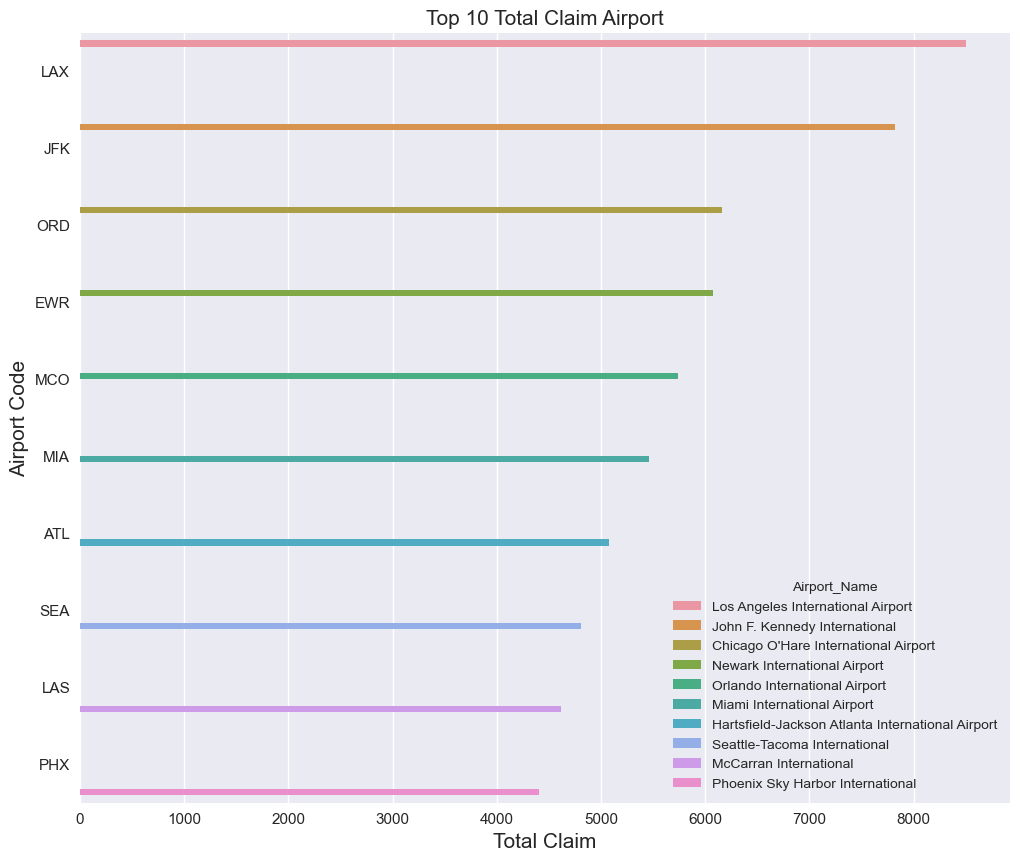

In [175]:
# Top 10 Bandara dengan klaim terbanyak  
plt.figure(figsize=(12,10))
sns.barplot(data=dfTopClaimAirport, y='Airport_Code', x='Total Claim',hue='Airport_Name')
plt.title('Top 10 Total Claim Airport', size=15)
plt.xticks(size=11)
plt.xlabel('Total Claim', size=15)
plt.yticks(size=11)
plt.ylabel('Airport Code', size=15)
plt.show()

Grafik diatas menjelaskan bahwa bandara dengan jumlah klaim terbanyak terdapat di bandara Los Angeles International Airport dan John F. Kennedy International Airport. Angka yang tinggi tersebut bisa terjadi salah satunya karena kedua bandara tersebut merupakan bandara yang paling sibuk di Amerika Serikat.

# Airline Claim

In [176]:
# Top 10 Airline Claim
dfTopClaimAirline = df[['Airline_Name']].value_counts().head(11).to_frame().reset_index()
dfTopClaimAirline
dfTopClaimAirline.rename(columns = {0:'Total Claim'}, inplace = True)
dfTopClaimAirline

,Airline_Name,Total Claim
0,Undisclosed,27834
1,DeltaAirLines,22431
2,AmericanAirlines,20997
3,SouthwestAirlines,17711
4,UAL,16892
5,USAir,11676
6,ContinentalAirlines,10469
7,NorthwestAirlines,8340
8,JetBlue,6188
9,AlaskaAirlines,5704


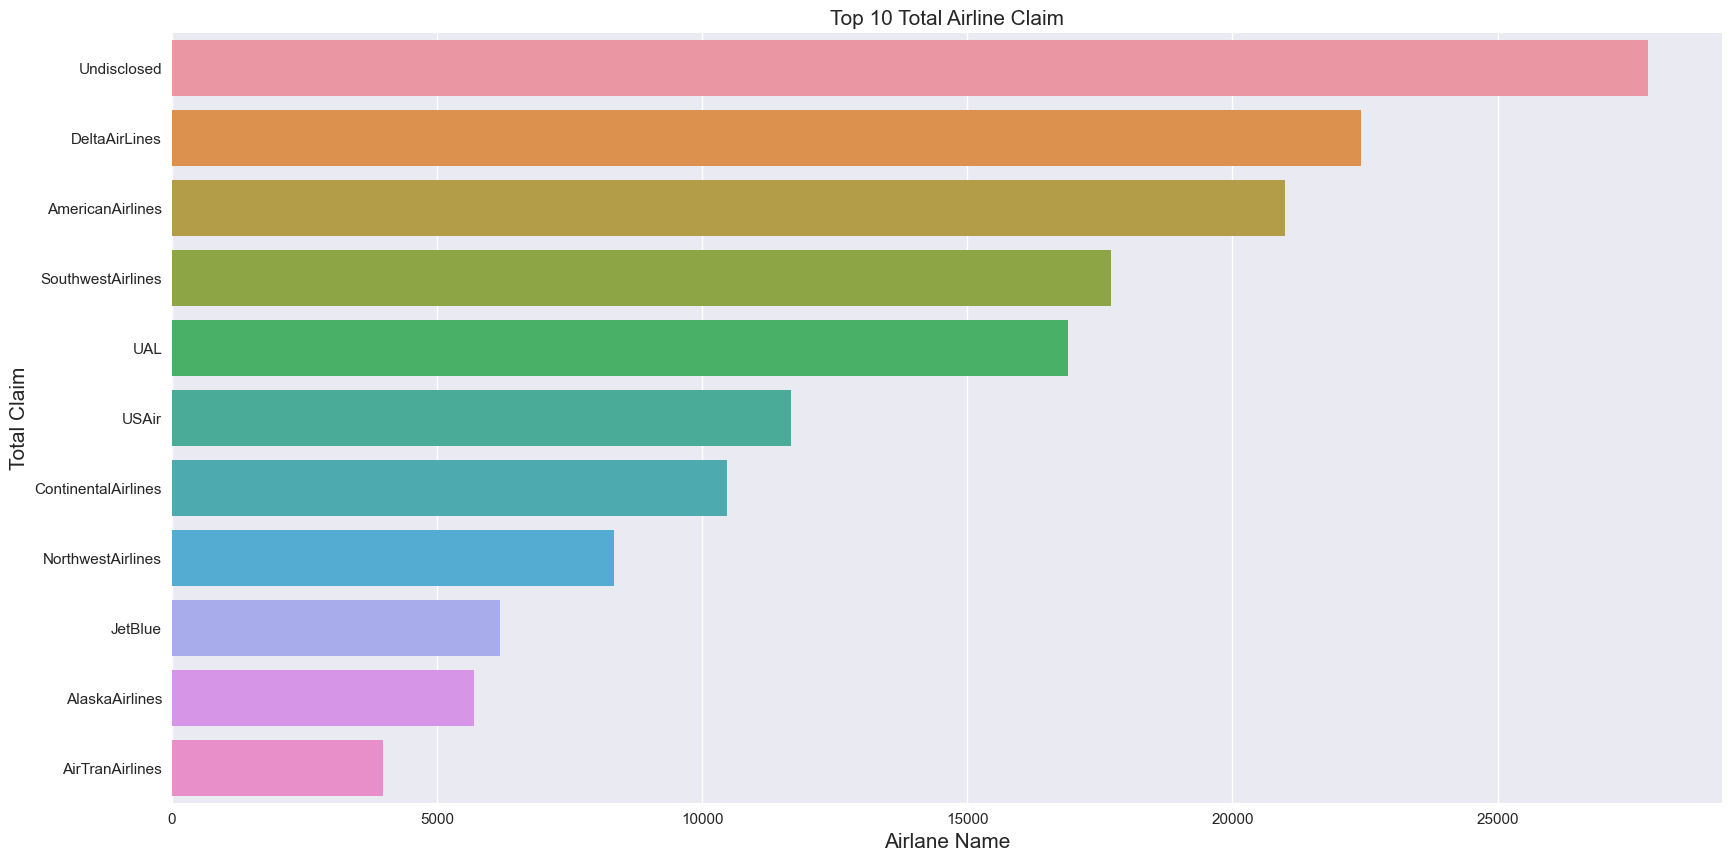

In [177]:
# Top 10 Airline Claim

plt.figure(figsize=(20,10))
sns.barplot(data=dfTopClaimAirline, y='Airline_Name',x='Total Claim')
plt.title('Top 10 Total Airline Claim', size=15)
plt.xticks(size=11)
plt.xlabel('Airlane Name', size=15)
plt.yticks(size=11)
plt.ylabel('Total Claim', size=15)
plt.show()

Grafik tersebut menjelaskan 10 Maskapai dengan jumlah claim terbanyak sepanjang tahun **2002-2015** dapat disimpulkan Delta airforce merupakan maskapai dengan jumlah claim terbanyak sepanjang tahun **2002-2015** serta masih banyak maskapai yang tidak terdeteksi jumlahnya maka valuenya dirubah menjadi **Undisclosed** 

# Claim type 

In [178]:
# Claim Type paling banyak
dfClaimType = df.groupby('Claim_Type',as_index=False)['Claim_Type'].value_counts().head(10)
dfClaimType = dfClaimType.sort_values(by='count',ascending=False)
dfClaimType.rename(columns = {"count":'Total Claim'}, inplace = True)
dfClaimType

,Claim_Type,Total Claim
5,Passenger Property Loss,99838
8,Property Damage,64804
4,Other,4767
7,Personal Injury,902
2,Employee Loss (MPCECA),417
6,Passenger Theft,416
3,Motor Vehicle,237
1,Complaint,14
9,Wrongful Death,3
0,Bus Terminal,1


In [179]:
# Persentase Claim Type 
df['Claim_Type'].value_counts()/df.shape[0]*100

Passenger Property Loss    58.248881
Property Damage            37.808855
Other                      2.781230 
Personal Injury            0.526257 
Employee Loss (MPCECA)     0.243292 
Passenger Theft            0.242709 
Motor Vehicle              0.138274 
Complaint                  0.008168 
Wrongful Death             0.001750 
Bus Terminal               0.000583 
Name: Claim_Type, dtype: float64

Text(0.5, 0, 'Total Claim')

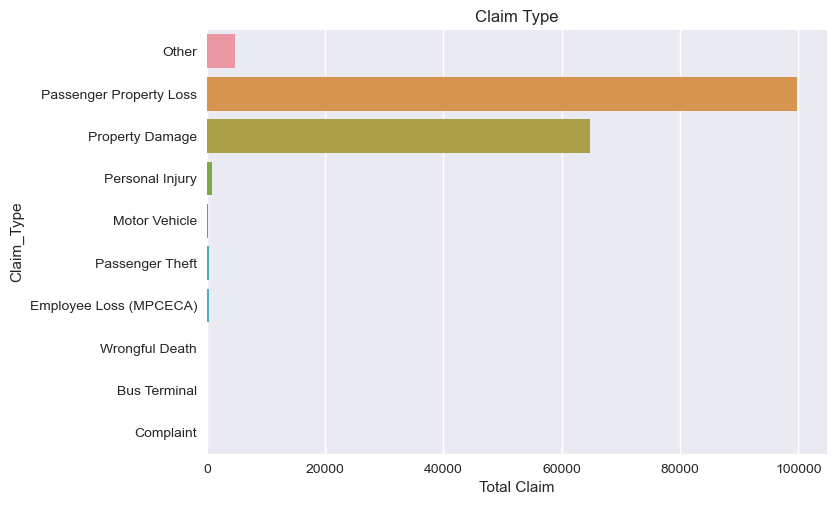

In [180]:
# Claim Type 
fig = sns.countplot(y='Claim_Type', data=df)
plt.title('Claim Type')
plt.xlabel('Total Claim')

Dari hasil analisis untuk Claim type terdapat total claim terbanyak yaitu dari **Passenger Property Loss** yang memiliki jumlah mencapai **99.838** Claim serta meiliki persentasi claim sebesar **58,2%** dari total keseluruhan claim 

# Item Claim 

In [181]:
# Top 10 Claim Item
dfItemClaim = df[['Item']].value_counts().head(11).to_frame().reset_index()
dfItemClaim.rename(columns = {0:'Total Claim'}, inplace = True)
dfItemClaim

,Item,Total Claim
0,Other,31201
1,Clothing,20138
2,Luggage,16561
3,Cameras,12595
4,Jewelry,9548
5,Locks,9393
6,Computer,8014
7,Baggage/Cases/Purses,6931
8,Others,5395
9,Computer & Accessories,4303


In [182]:
df['Item'].value_counts()/df.shape[0]*100

Other                 18.203723
Clothing              11.749193
Luggage               9.662250 
Cameras               7.348351 
Jewelry               5.570628 
                        ...    
Typewriters           0.000583 
Electric Blankets     0.000583 
Furs                  0.000583 
Rugs                  0.000583 
Stenotype Machines    0.000583 
Name: Item, Length: 130, dtype: float64

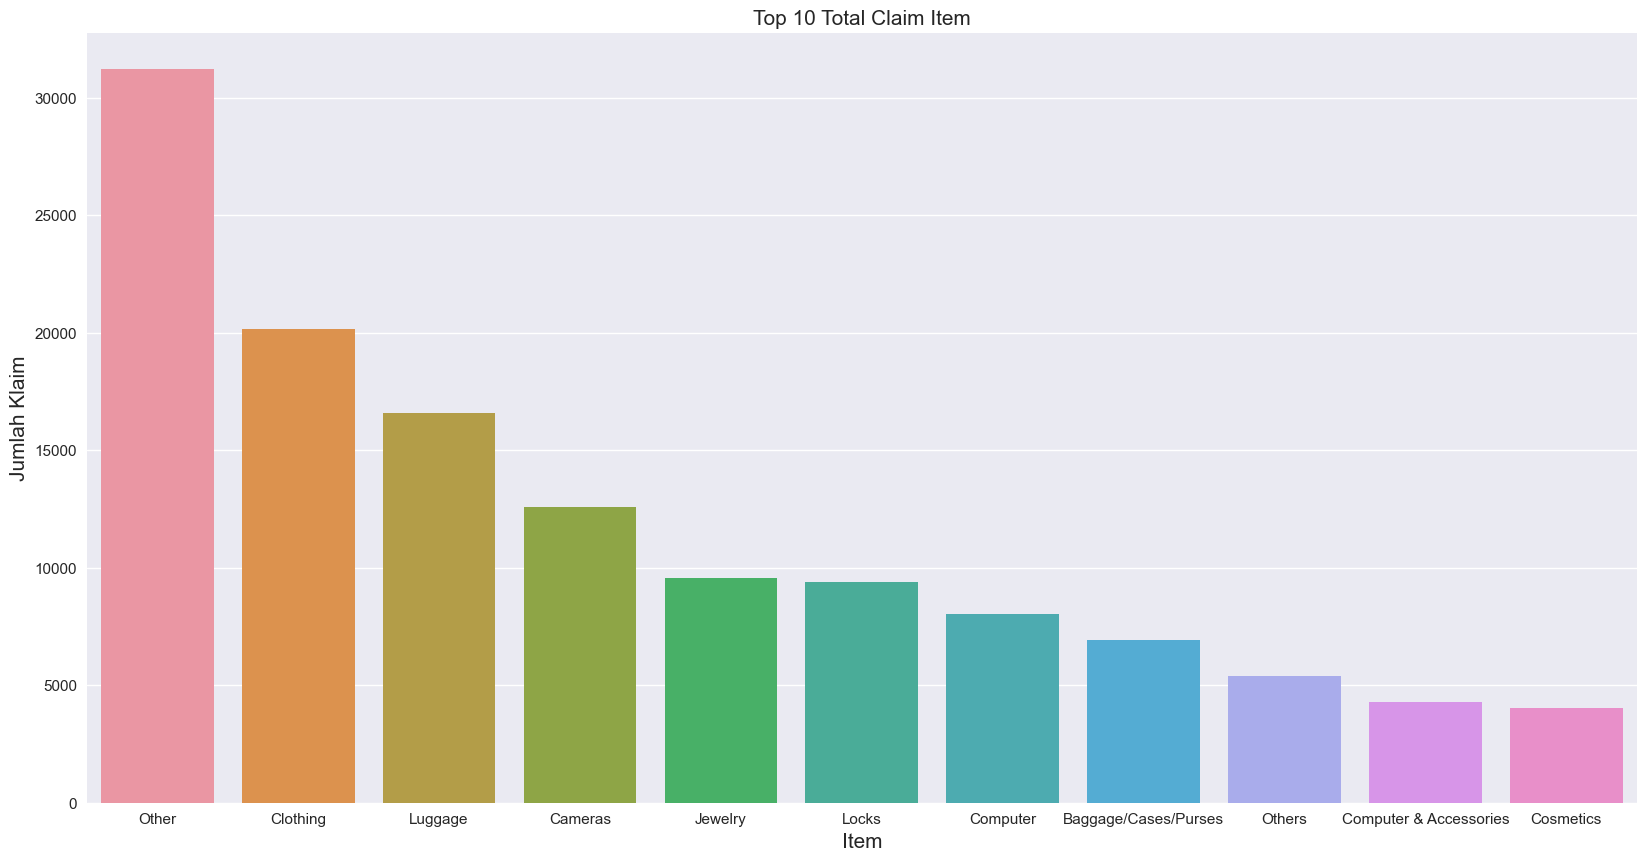

In [183]:
# Top 10 Claim Item
plt.figure(figsize=(20,10))
sns.barplot(data=dfItemClaim, x='Item',y='Total Claim')
plt.title('Top 10 Total Claim Item', size=15)
plt.xticks(size=11)
plt.xlabel('Item', size=15)
plt.yticks(size=11)
plt.ylabel('Jumlah Klaim', size=15)
plt.show()

Dari hasil analisis untuk Claim Item terdapat total claim item terbanyak yaitu dari **Clothing** yang memiliki jumlah mencapai **20138** Claim serta meiliki persentasi claim sebesar **11,7%** dari total keseluruhan claim serta masih ada value other yang memiliki persentase **18.2%**

# Airport Claim Type 

In [184]:
# Top 10 Airport Claim Type 
dfAirportClaimType=pd.crosstab(df['Airport_Code'],df['Claim_Type'])
dfAirportClaimType['Total']=dfAirportClaimType.sum(axis=1)
dfAirportClaimType = dfAirportClaimType.sort_values('Total',ascending=False).head(10)
dfAirportClaimType

Claim_Type,Bus Terminal,Complaint,Employee Loss (MPCECA),Motor Vehicle,Other,Passenger Property Loss,Passenger Theft,Personal Injury,Property Damage,Wrongful Death,Total
Airport_Code,,,,,,,,,,,
LAX,0,2,21,8,316,5125,21,45,2961,0,8499
JFK,0,1,11,7,161,5395,17,37,2192,0,7821
ORD,0,0,20,3,173,3298,20,21,2625,0,6160
EWR,0,1,20,4,168,3802,13,23,2048,0,6079
MCO,0,1,13,2,166,3628,12,30,1886,0,5738
MIA,0,0,18,4,182,3321,12,20,1903,0,5460
ATL,0,0,6,2,106,3093,16,32,1819,0,5074
SEA,0,1,15,0,165,2754,17,17,1838,0,4807
LAS,0,0,10,1,115,2917,15,32,1524,0,4614


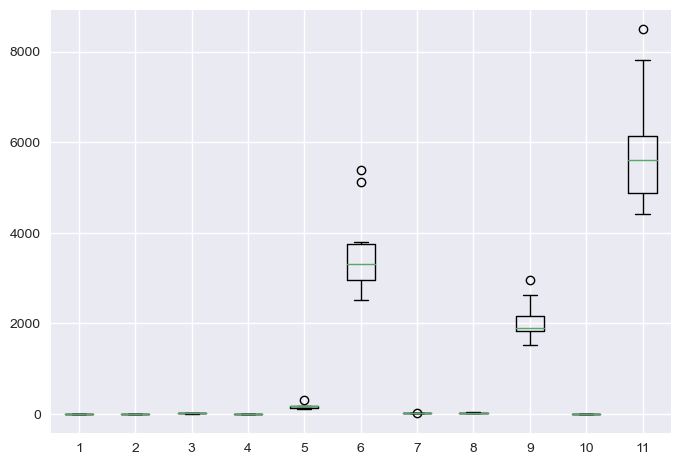

<Figure size 1000x700 with 0 Axes>

In [185]:
box=np.random.normal(dfAirportClaimType)
plt.boxplot(box)
fig = plt.figure(figsize =(10, 7))

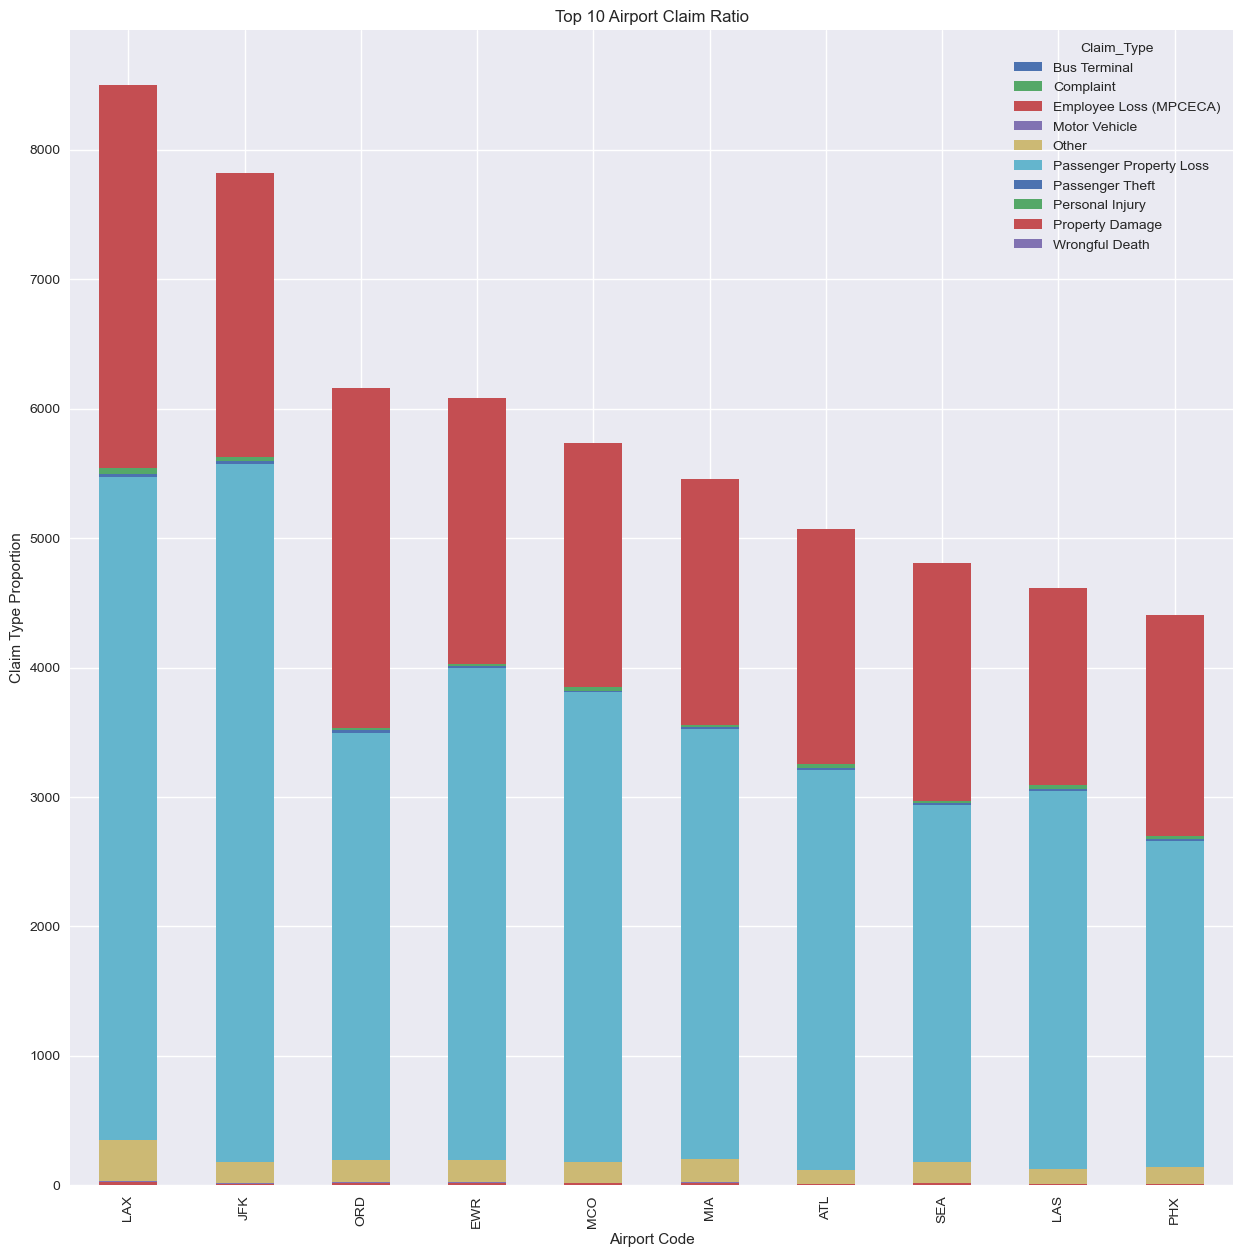

In [186]:
# Kolom Total perlu di drop karena tidak diperlukan 
dfAirportClaimType.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(15,15), 
title='Top 10 Airport Claim Ratio', 
xlabel='Airport Code', 
ylabel='Claim Type Proportion')
plt.show()

Grafik Tersebut Menjabarkan informasi tentang tipe claim yang paling banyak diajukan di setiap airport yaitu **LAX** memiliki jumlah claim tertinggi diikuti oleh **JFK** dengan rata-rata claim tertinggi yaitu passenger Property Loss.

In [187]:
# Airline Claim Type 
dfAirlineClaimType=pd.crosstab(df['Airline_Name'],df['Claim_Type'])
dfAirlineClaimType['Total']=dfAirlineClaimType.sum(axis=1)
dfAirlineClaimType = dfAirlineClaimType.sort_values('Total',ascending=False).head(10)
dfAirlineClaimType

Claim_Type,Bus Terminal,Complaint,Employee Loss (MPCECA),Motor Vehicle,Other,Passenger Property Loss,Passenger Theft,Personal Injury,Property Damage,Wrongful Death,Total
Airline_Name,,,,,,,,,,,
Undisclosed,0,4,93,213,1574,12190,76,244,13437,3,27834
DeltaAirLines,0,2,43,6,510,13399,53,109,8309,0,22431
AmericanAirlines,0,1,60,3,539,12722,40,76,7556,0,20997
SouthwestAirlines,0,0,25,3,284,10528,35,106,6730,0,17711
UAL,0,2,39,3,373,9875,40,73,6487,0,16892
USAir,0,1,20,2,300,6921,23,76,4333,0,11676
ContinentalAirlines,0,0,30,1,259,6788,28,39,3324,0,10469
NorthwestAirlines,0,0,30,0,294,4658,34,31,3293,0,8340
JetBlue,1,1,7,2,94,4085,10,27,1961,0,6188


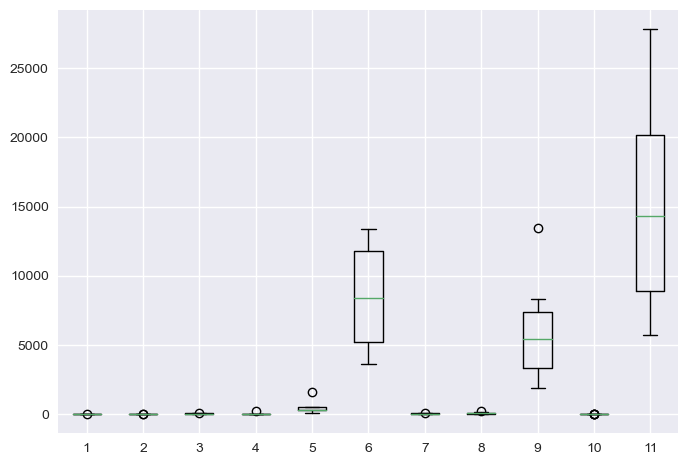

<Figure size 1000x700 with 0 Axes>

In [188]:
box=np.random.normal(dfAirlineClaimType)
plt.boxplot(box)
fig = plt.figure(figsize =(10, 7))

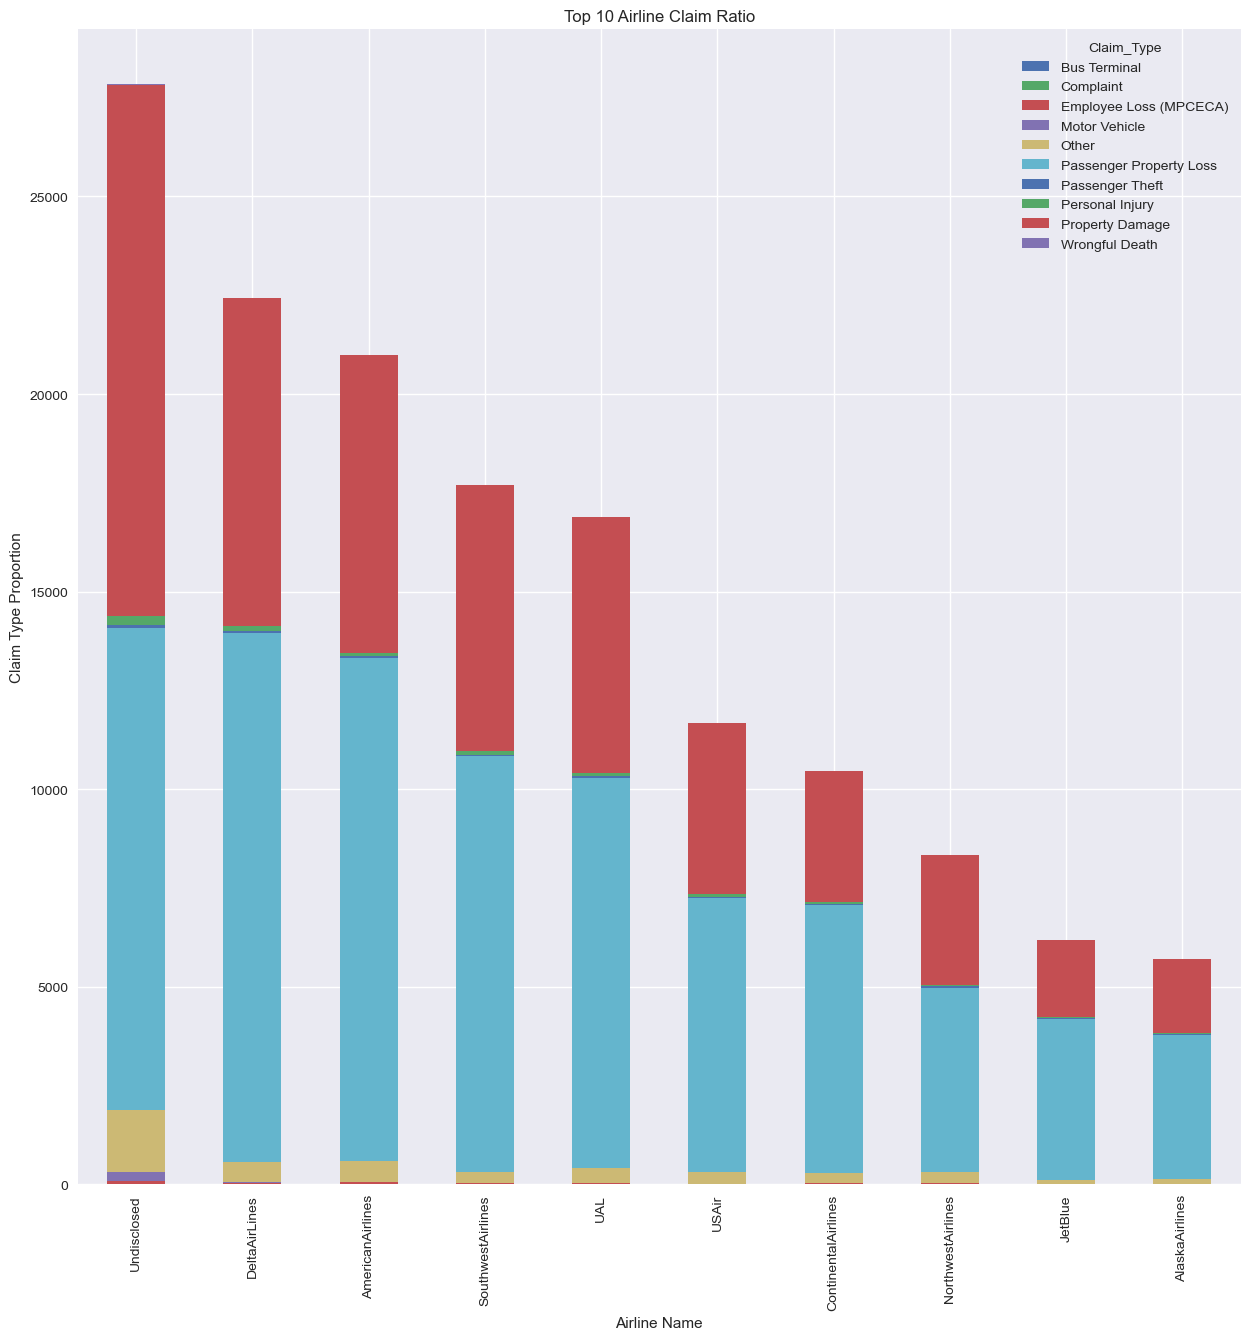

In [189]:
# Top 10 Airline Claim Type 
dfAirlineClaimType.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(15,15), 
title='Top 10 Airline Claim Ratio', 
xlabel='Airline Name', 
ylabel='Claim Type Proportion')
plt.show()

Grafik Tersebut Menjabarkan informasi tentang tipe claim yang paling banyak diajukan di setiap ailine yaitu **Delta Airline** memiliki jumlah claim tertinggi diikuti oleh **American Airline** dengan rata-rata claim tertinggi yaitu passenger Property Loss diikuti oleh Property Damage. 

# Airport Claim Site 

In [190]:
# Airport Claim Site 
dfAirportClaimSite=pd.crosstab(df['Airport_Code'],df['Claim_Site'])
dfAirportClaimSite['Total']=dfAirportClaimSite.sum(axis=1)
dfAirportClaimSite = dfAirportClaimSite.sort_values('Total',ascending=False).head(10)
dfAirportClaimSite

Claim_Site,Bus Station,Checked Baggage,Checkpoint,Motor Vehicle,Other,Total
Airport_Code,,,,,,
LAX,1,6527,1894,7,70,8499
JFK,1,6191,1566,6,57,7821
ORD,1,4910,1187,3,59,6160
EWR,0,5050,978,5,46,6079
MCO,0,4531,1173,0,34,5738
MIA,0,4614,813,4,29,5460
ATL,0,3930,1113,2,29,5074
SEA,0,3912,862,1,32,4807
LAS,0,3639,939,0,36,4614


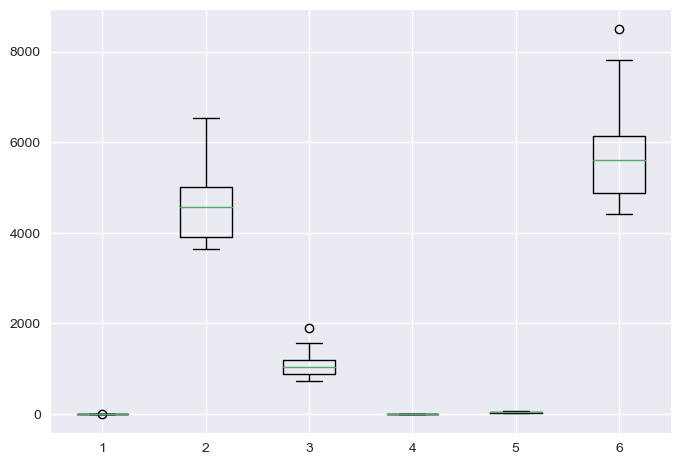

<Figure size 1000x700 with 0 Axes>

In [191]:
box=np.random.normal(dfAirportClaimSite)
plt.boxplot(box)
fig = plt.figure(figsize =(10, 7))

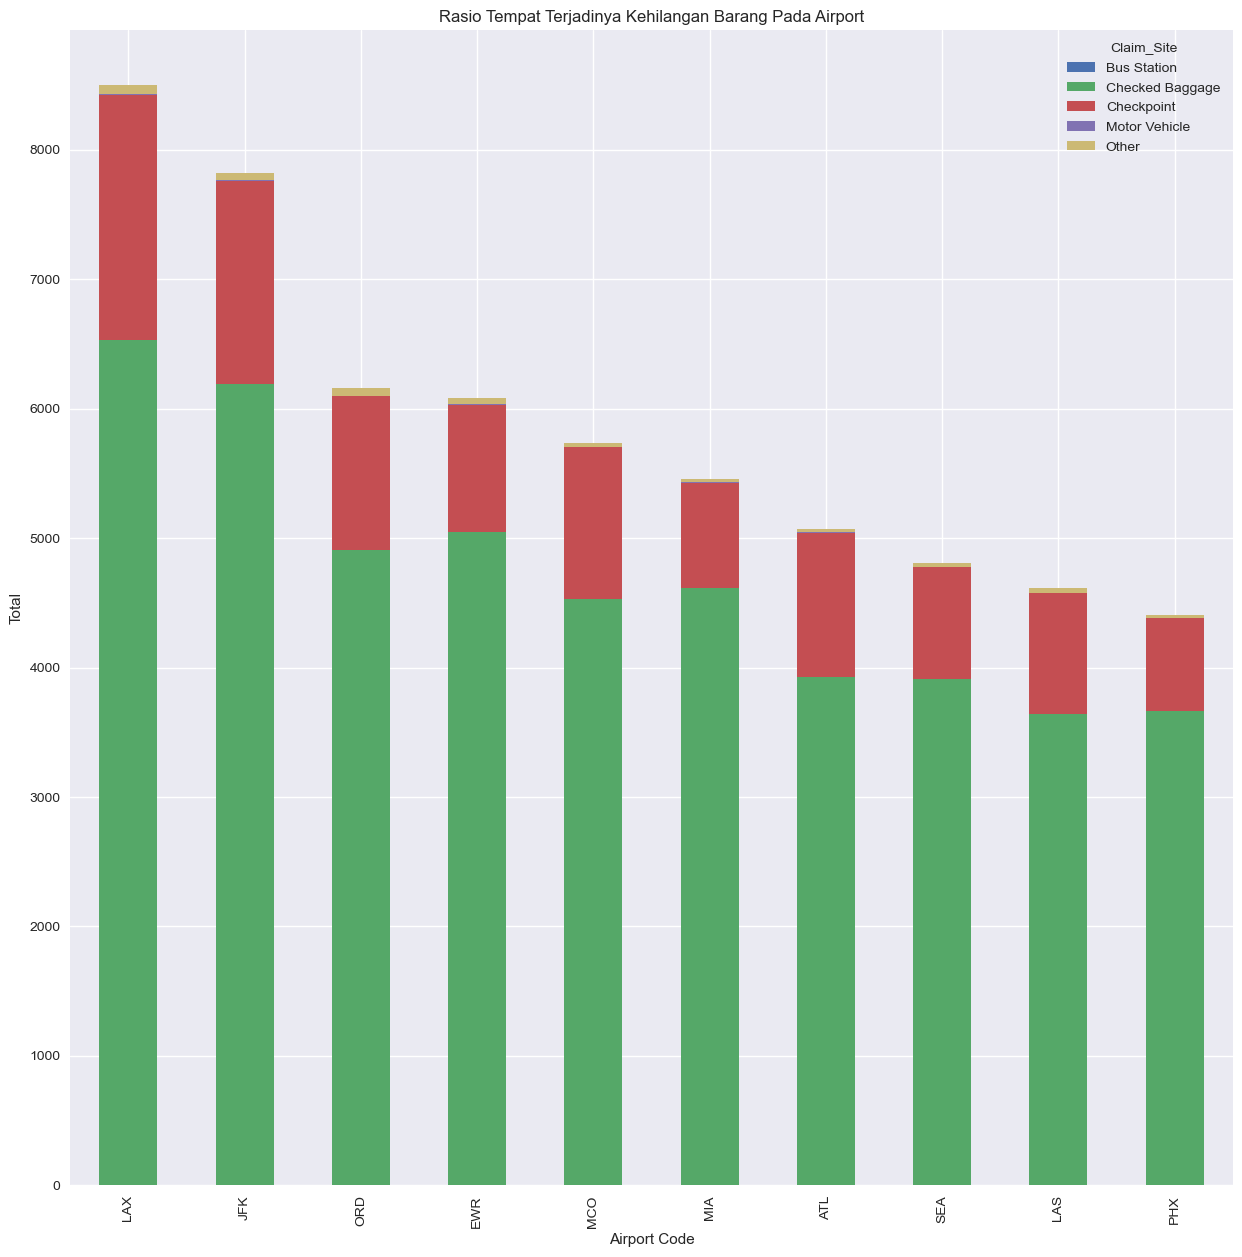

In [192]:
dfAirportClaimSite.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(15,15), 
title='Rasio Tempat Terjadinya Kehilangan Barang Pada Airport', 
xlabel='Airport Code', 
ylabel='Total')
plt.show()

Grafik Tersebut Menjabarkan informasi tentang claim site yang paling banyak diajukan di setiap airport yaitu **LAX** memiliki jumlah claim tertinggi di **Checked Baggade** diikuti oleh **JFK**, Dengan rata-rata claim site tertinggi terdapat pada **Checked Baggade** kemudian diikuti oleh **Checkpoint**. 
Serta masih terdapat data yang tidak terdeteksi maka diberi value **Undisclosed** agar dapat menjadi perbaikan pendataan oleh TSA agar data yang miss dapat dikurangi

# Airline Claim Site 

In [193]:
# Airline Claim Site 
dfAirlineClaimSite=pd.crosstab(df['Airline_Name'],df['Claim_Site'])
dfAirlineClaimSite['Total']=dfAirlineClaimSite.sum(axis=1)
dfAirlineClaimSite = dfAirlineClaimSite.sort_values('Total',ascending=False).head(10)
dfAirlineClaimSite

Claim_Site,Bus Station,Checked Baggage,Checkpoint,Motor Vehicle,Other,Total
Airline_Name,,,,,,
Undisclosed,0,17822,9277,282,453,27834
DeltaAirLines,0,18376,3950,0,105,22431
AmericanAirlines,1,17465,3439,0,92,20997
SouthwestAirlines,2,14045,3581,0,83,17711
UAL,1,14237,2553,0,101,16892
USAir,1,9446,2151,0,78,11676
ContinentalAirlines,0,8901,1502,0,66,10469
NorthwestAirlines,0,7239,1058,0,43,8340
JetBlue,0,5001,1165,0,22,6188


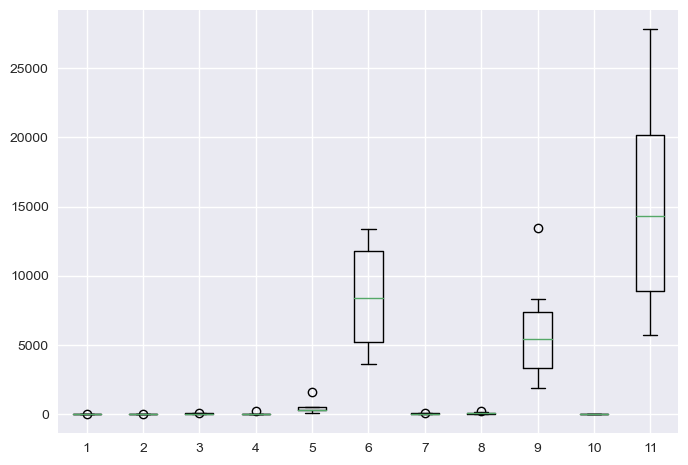

<Figure size 1000x700 with 0 Axes>

In [194]:
box=np.random.normal(dfAirlineClaimType)
plt.boxplot(box)
fig = plt.figure(figsize =(10, 7))

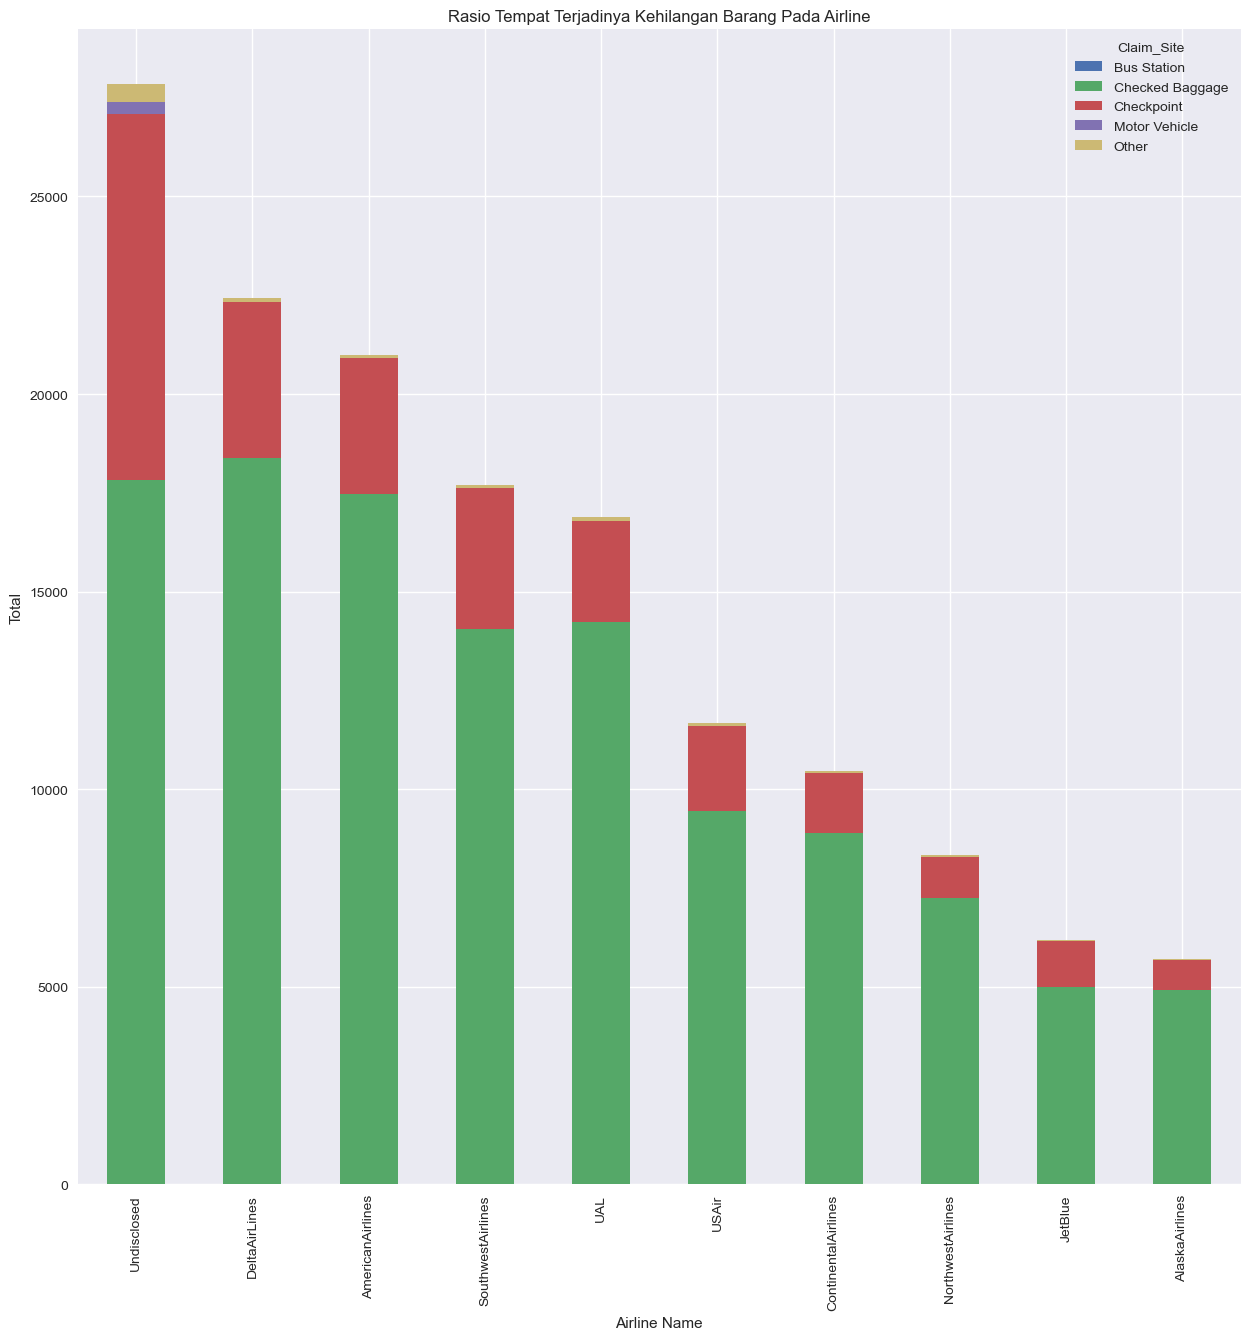

In [195]:
dfAirlineClaimSite.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(15,15), 
title='Rasio Tempat Terjadinya Kehilangan Barang Pada Airline', 
xlabel='Airline Name', 
ylabel='Total')
plt.show()

Grafik Tersebut Menjabarkan informasi tentang claim site yang paling banyak diajukan di setiap airline yaitu **Delta Airline** memiliki jumlah claim tertinggi di **Checked Baggade** diikuti oleh **American Airline**, Dengan rata-rata claim site tertinggi terdapat pada **Checked Baggade** kemudian diikuti oleh **Checkpoint**, Serta masih terdapat data yang tidak terdeteksi maka diberi value **Undisclosed** agar dapat menjadi perbaikan pendataan oleh TSA agar data yang miss dapat dikurangi

# Claim Status

In [196]:
# Total Claim Status 
dfClaimStatus = df[['Status']].value_counts().head(11).to_frame().reset_index()
dfClaimStatus.rename(columns = {0:'Total Klaim'}, inplace = True)
dfClaimStatus

,Status,Total Klaim
0,Denied,94195
1,Approved,45381
2,Settled,31823


In [197]:
df['Status'].value_counts()/df.shape[0]*100

Denied      54.956563
Approved    26.476817
Settled     18.566619
Name: Status, dtype: float64

Text(0.5, 0, 'Total Claim')

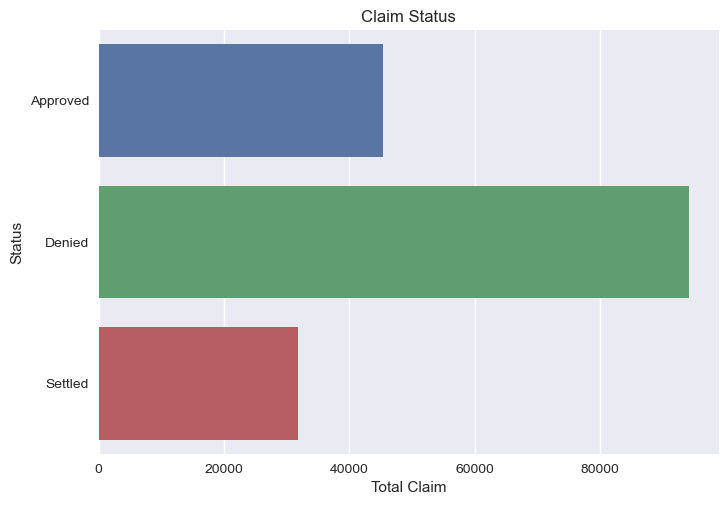

In [198]:
# Total Claim Status 
fig = sns.countplot(y='Status', data=df)
plt.title('Claim Status')
plt.xlabel('Total Claim')

Grafik tersebut menjelaskan tentang bagaimana claim status yang dilakukan oleh penumpang apakah penumpang dapat mengclaim barangnya yang hilang atau malah claimnya ditolak, Terdapat persentase claim ditolak sebesar **54,9%** dari angka tersebut masih jauh dari angka baik dibandingkan dengan persentase **Approved** yang hanya **26,4%** serta claim yang dalam proses settled sebesar **18,5%**.

In [199]:
# Airport Claim Status
dfAirportClaimStatus=pd.crosstab(df['Airport_Code'],df['Status'])
dfAirportClaimStatus['Total']=dfAirportClaimStatus.sum(axis=1)
dfAirportClaimStatus = dfAirportClaimStatus.sort_values('Total',ascending=False).head(10)
dfAirportClaimStatus.reset_index()

Status,Airport_Code,Approved,Denied,Settled,Total
0,LAX,2001,4743,1755,8499
1,JFK,1312,5074,1435,7821
2,ORD,1656,3349,1155,6160
3,EWR,1412,3186,1481,6079
4,MCO,1500,3345,893,5738
5,MIA,1238,3372,850,5460
6,ATL,1211,3007,856,5074
7,SEA,1519,2256,1032,4807
8,LAS,839,3131,644,4614
9,PHX,1353,2200,855,4408


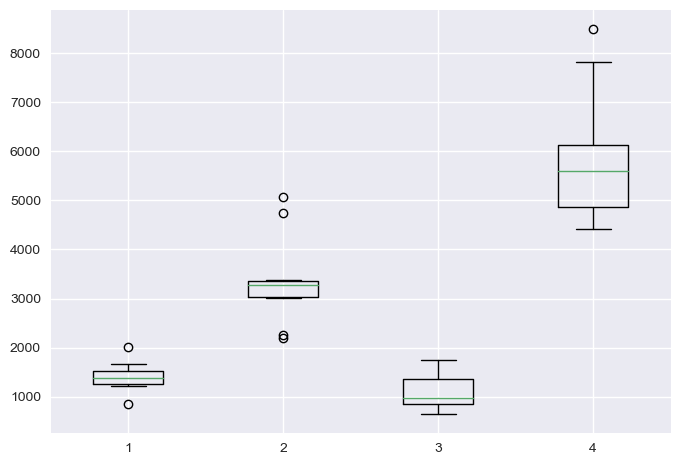

<Figure size 1000x700 with 0 Axes>

In [200]:
# Boxplot Airport Claim Status 
box=np.random.normal(dfAirportClaimStatus)
plt.boxplot(box)
fig = plt.figure(figsize =(10, 7))

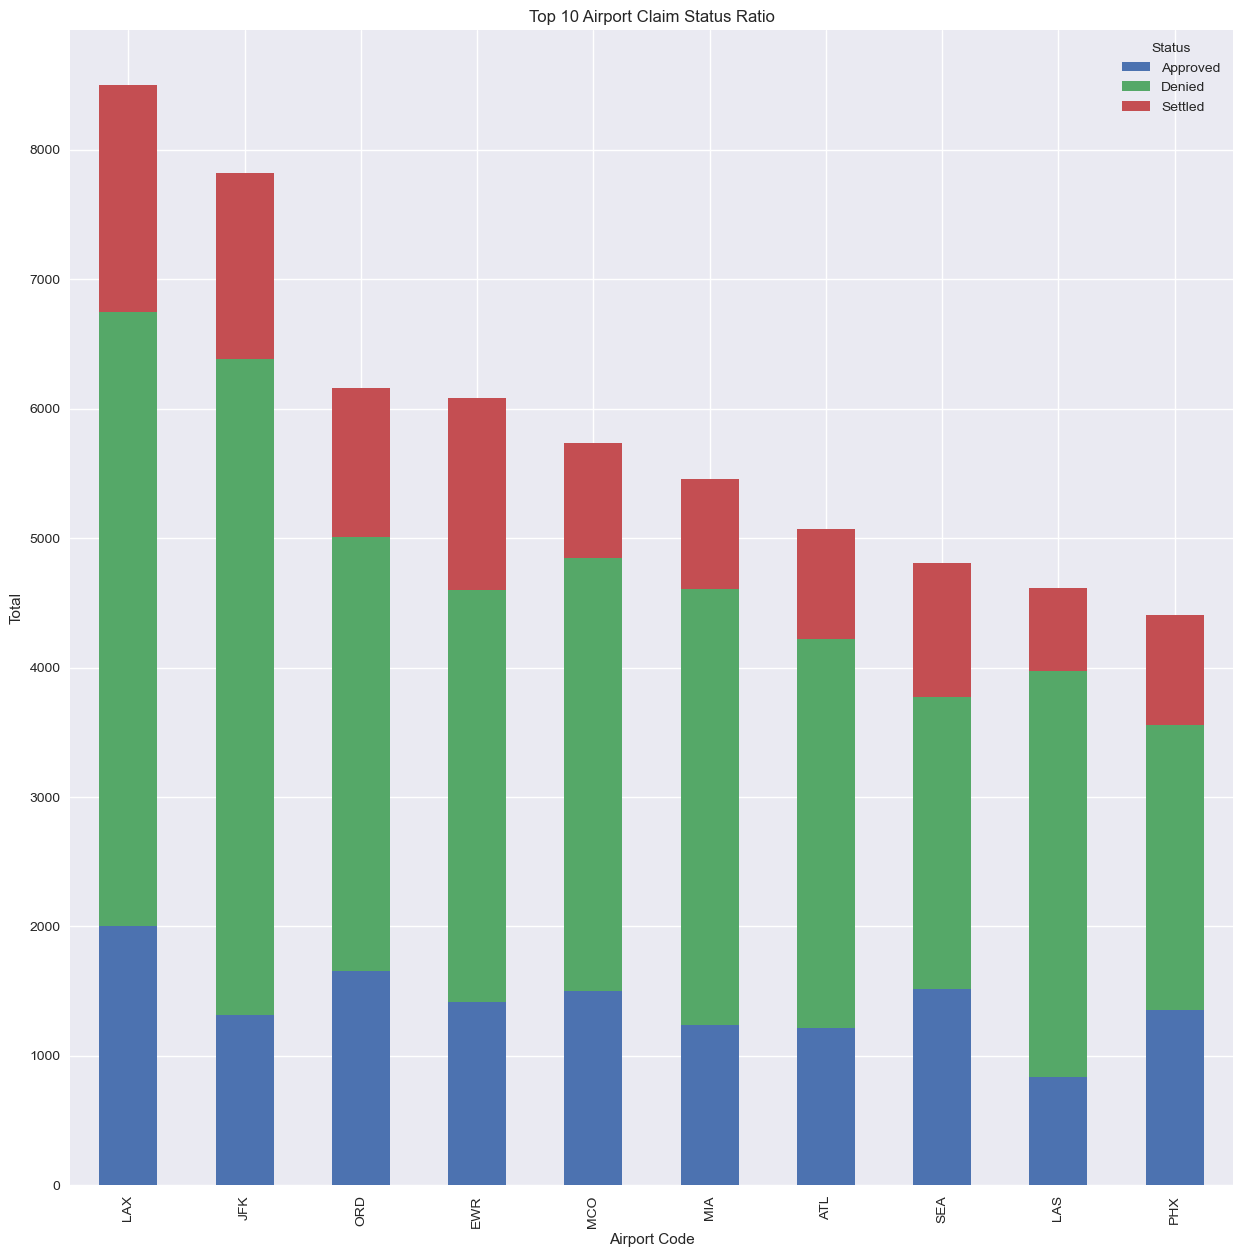

In [201]:
# Airport Claim Status
dfAirportClaimStatus.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(15,15), 
title='Top 10 Airport Claim Status Ratio', 
xlabel='Airport Code', 
ylabel='Total')
plt.show()

Dari grafik tersebut dapat disimpulkan bahwa status **Approved** yang  oleh setiap Airport masih jauh dari kata baik karena total claim **Denied** masih lebih mendominasi dibandingkan dengan total claim **Approved** oleh setiap Airport.

In [202]:
# Airline Claim Status 
dfAirlineClaimStatus=pd.crosstab(df['Airline_Name'],df['Status'])
dfAirlineClaimStatus['Total']=dfAirlineClaimStatus.sum(axis=1)
dfAirlineClaimStatus = dfAirlineClaimStatus.sort_values('Total',ascending=False).head(10)
dfAirlineClaimStatus

Status,Approved,Denied,Settled,Total
Airline_Name,,,,
Undisclosed,9743,11267,6824,27834
DeltaAirLines,5608,13095,3728,22431
AmericanAirlines,5131,12130,3736,20997
SouthwestAirlines,4934,10080,2697,17711
UAL,4319,9543,3030,16892
USAir,2928,6785,1963,11676
ContinentalAirlines,2283,6124,2062,10469
NorthwestAirlines,2224,4420,1696,8340
JetBlue,1293,3908,987,6188


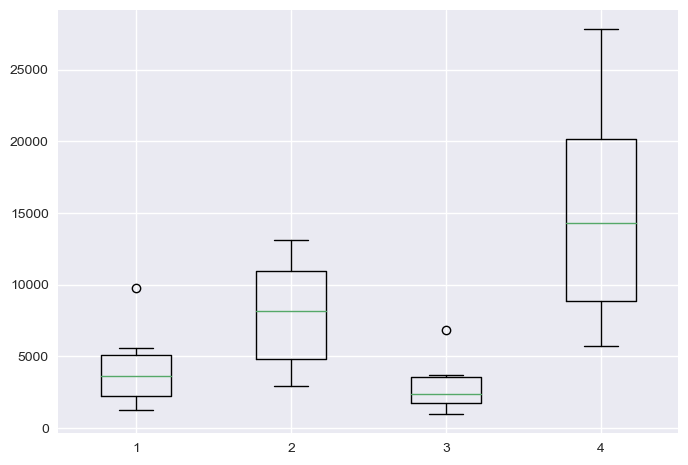

<Figure size 1000x700 with 0 Axes>

In [203]:
# Boxplot Airline Claim Status 
box=np.random.normal(dfAirlineClaimStatus)
plt.boxplot(box)
fig = plt.figure(figsize =(10, 7))

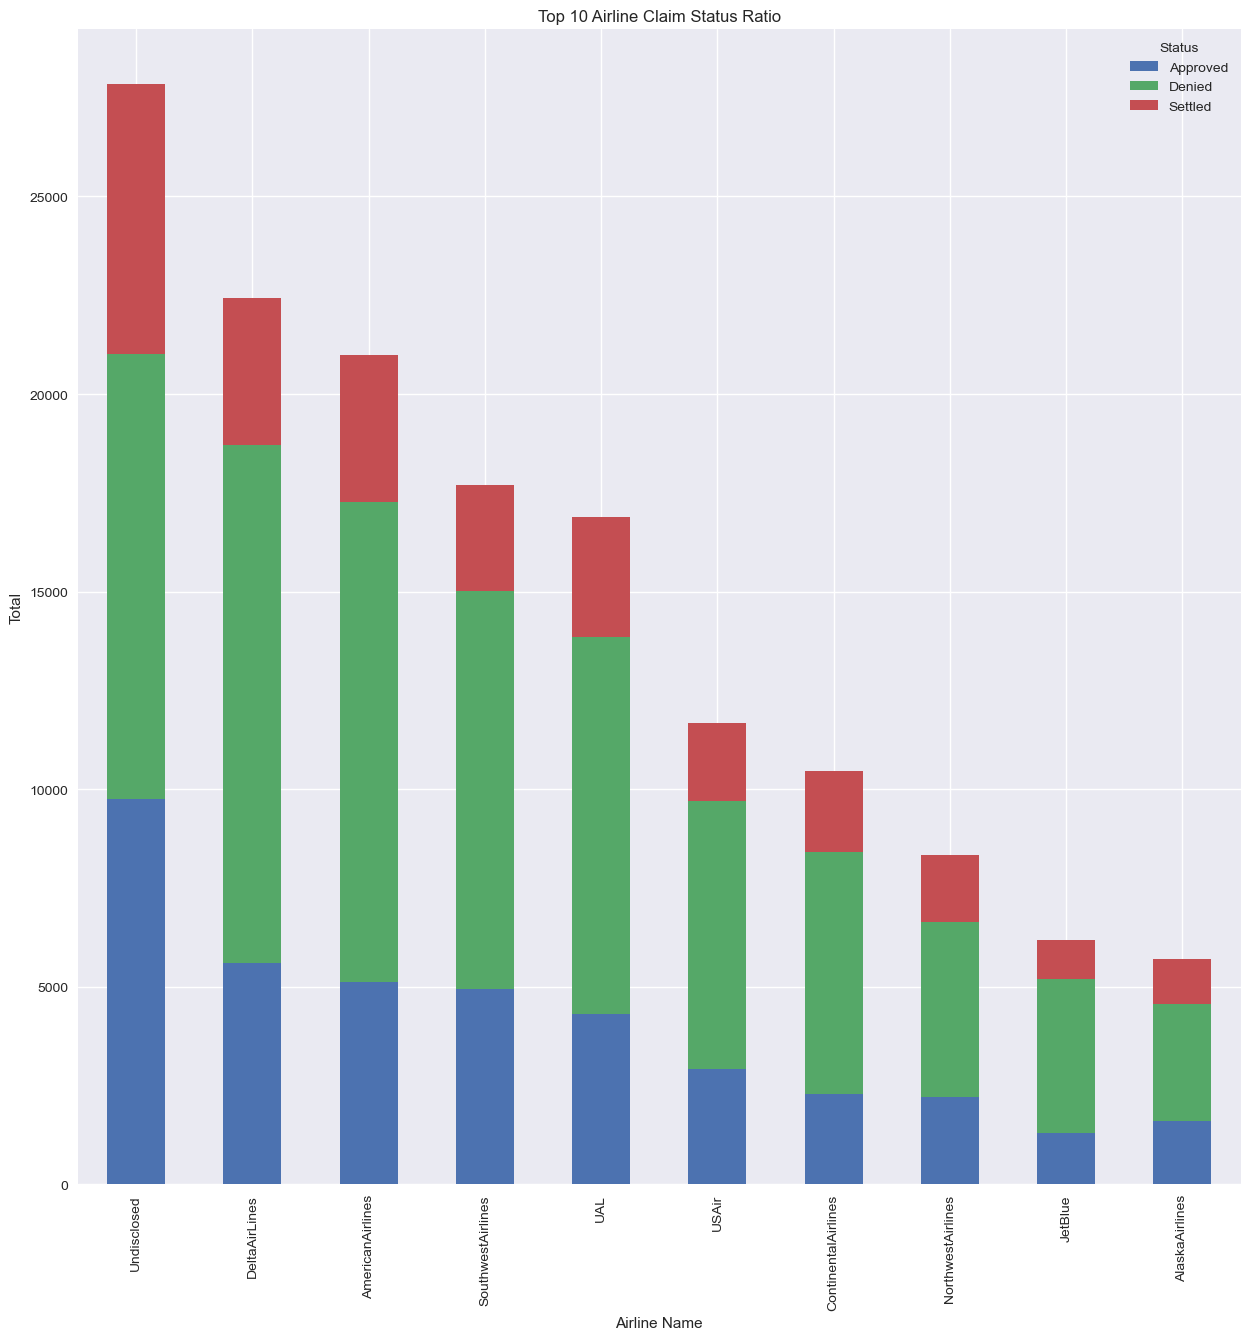

In [204]:
# Airline Claim Status 
dfAirlineClaimStatus.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(15,15), 
title='Top 10 Airline Claim Status Ratio', 
xlabel='Airline Name', 
ylabel='Total')
plt.show()

Dari grafik tersebut dapat disimpulkan bahwa status **Approved** yang  oleh setiap maskapai masih jauh dari kata baik karena total claim **Denied** masih lebih mendominasi dibandingkan dengan total claim **Approved** oleh setiap Maskapai.

# Kesimpulan Dan Saran 

# Kesimpulan
Dari hasil analisis yang telah dilakukan dapat menarik kesimpulan untuk menjawab pertanyaan **bagaimana karakteristik klaim yang diajukan di setiap Bandara dan maskapai oleh penumpang** ialah: 
* Terdapat 453 bandara dengan klaim sebanyak 171.399 klaim sepanjang tahun 2002-2015 Dengan total jumlah klaim tertinggi di angka **8499 oleh bandara LAX (Los Angeles International Airport)** Diikuti oleh **7821 JFK (John F. Kennedy International**, **6160 ORD (Chicago O'Hare International Airport**), Dst
* Terdapat 218 Airline dengan claim sebanyak **171.399** dengan jumlah claim tertinggi oleh DeltaAirLines sebanyak **22431** claim diikuti oleh AmericanAirlines dengan **20997** claim , SouthwestAirlines	dengan **17711** claim, Dst
* Tipe claim yang paling banyak diajukan yaitu merupakan properti milik penumpang dengan jumlah mencapai **99.838** Claim serta meiliki persentasi claim sebesar **58,2%** dari total keseluruhan claim dilanjutkan dengan kerusakan barang milik penumpang sebanyak **64.804** Claim dan memiliki persantase sebesar **37.8%.**
* Item dengan jumlah terbanyak di claim yaitu Clothing dengan total sebanyak **20.138** dengan persentase sebesar **11.7%** kemudian dilanjutkan dengan Luggage **16.561** dengan persentase sebesar **9.6%**.
* Tipe claim tertinggi yang diterima oleh airport yaitu barang milik penumpang yaitu sebanyak **5125** yang dialami oleh **LAX(Los Angeles International Airport)** 
* Kemudian tipe claim tertinggi yang diterima oleh maskapai adalah barang milik penumpang, yang tertinggi dialami oleh maskapai **Delta Airline** sebanyak  **13.399** Claim.
* Selanjutnya Claim site yang dialami oleh airport dan maskapai paling banyak terdapat claim pada Checked Baggage yaitu mencapai jumlah total sebanyak **6.527** pada **LAX(Los Angeles International Airport)** dan **18.376** pada **Delta Airline**.
* Persentase claim status yang dialami oleh penumpang Terdapat persentase claim ditolak sebesar **54.9%** dari angka tersebut masih jauh dari angka baik dibandingkan dengan persentase **Approved** yang hanya **26.4%** serta claim yang dalam proses settled sebesar **18.5%**.

# Saran 

Dari kesimpulan yang telah dijabarkan maka, Terdapat beberapa saran maupun rekomendasi yang dapat dipertimbangkan oleh TSA demi meningkatkan pelayananya yaitu seperti: 
* Peningkatan layanan keamanan pada bandara dan maskapai dengan tingkat claim tertinggi 
* Mempertimbangkan peningkatan layanan keamanan pada lokasi dengan tingkat claim kehilangan tertinggi yaitu pada *Checked Baggade dan Check Point*, Misalnya bisa dengan cara menambahkan petugas maupun sistem sortir bagasi yang lebih baik. 
* TSA perlu meningkatkan kontribusi dan kerjasama dengan maskapai maupun bandara dalam menangani masalah sehingga pada saat penumpang mengalami kehilangan barang maupun terjadi kerusakan pada barang penumbang maka TSA dapat melakukan *Tracking* barang tersebut demi mengurangi resiko barang hilang maupun rusak yang dialami oleh penumpang.

In [205]:
df.to_csv("TSAClaim_NEWCLEAN.csv", index=False)